In [1]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from time import time
import matplotlib.pyplot as plt
import os
import pickle
import scipy
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.special import comb
import plotly.express as px

# Load data

In [2]:
features_folder = "C:\\Users\\t-anmend\\Documents\\train_1\\"

In [200]:
features_folder = "/home/t-anmend/SONYC/"

In [201]:
with open(os.path.join(features_folder,'train1_stats_features.txt'),'rb') as f:
    features  = pickle.load(f)

In [202]:
features = np.array(features)

In [203]:
features

array([[array([ 1.52600006e+02,  1.87999992e+01,  1.61399994e+02,  5.39000015e+01,
        2.50300003e+02,  7.60999985e+01,  1.30699997e+02,  1.14900002e+02,
        1.49000000e+02,  2.03500000e+02,  1.60800003e+02,  1.24699997e+02,
        1.63399994e+02,  1.77000000e+02,  1.41199997e+02,  9.41999969e+01,
        8.70999985e+01,  1.60199997e+02,  1.35100006e+02,  1.10199997e+02,
        3.30999985e+01,  1.95699997e+02,  6.74000015e+01,  1.55300003e+02,
        1.29600006e+02,  1.62800003e+02,  1.69899994e+02,  1.04300003e+02,
        1.49199997e+02,  8.53000031e+01,  1.01900002e+02,  1.49500000e+02,
        1.74199997e+02,  1.22400002e+02,  7.36999969e+01,  1.26500000e+02,
        1.53199997e+02,  6.02999992e+01,  1.12400002e+02,  2.09300003e+02,
        1.18500000e+02,  1.84899994e+02,  3.42000008e+01,  1.59100006e+02,
        9.30000019e+00,  7.90000000e+01,  4.97000008e+01,  1.13500000e+02,
        5.45999985e+01,  2.50699997e+02,  2.09100006e+02,  1.67000008e+01,
        1.2009999

In [5]:
features_stats = np.zeros((features.shape[0],len(features[0][0])))
for i in range(features.shape[0]):
    features_stats[i] = features[i][0]

In [6]:
features_stats.shape

(2348, 896)

In [7]:
features_stats_256 = features_stats[:,0:256].copy()

In [8]:
features_stats_256.shape

(2348, 256)

In [9]:
features_stats.shape

(2348, 896)

In [204]:
files = []
for i in range(features.shape[0]):
    files.append(features[i][2])

In [205]:
files[0]

'01_000006.pkl'

In [41]:
labels = []
for i in range(features.shape[0]):
    labels.append(features[i][1])

In [42]:
len(labels)

2348

In [21]:
label_dict = {}

labels_ = []

for i in range(len(labels)):
    for j in range(len(labels[i])):
        labels_.append(labels[i][j])
    
unique_labels = np.unique(labels_)
num_label = 0
for label in unique_labels:
    label_dict[label] = num_label
    num_label = num_label + 1

In [12]:
with open(os.path.join(features_folder,'train1_tsne2D_features256.txt'),'rb') as f:
    tsne2D_256  = pickle.load(f)

In [186]:
tsne_2D_256_pandas = pd.DataFrame()

In [187]:
tsne_2D_256_pandas['x'] = tsne2D_256[:,0]

In [188]:
tsne_2D_256_pandas['y'] = tsne2D_256[:,1]

In [189]:
tsne_2D_256_pandas.head()

,x,y
0,-17.331894,-6.081714
1,-38.775444,-13.632947
2,13.060108,-37.888832
3,-3.454923,-31.970268
4,-10.672851,-36.490677


In [8]:
with open(os.path.join(features_folder,'train1_tsne3D_features256.txt'),'rb') as f:
    tsne3D_256  = pickle.load(f)

In [169]:
tsne_3D_256_pandas = pd.DataFrame()

In [170]:
tsne_3D_256_pandas['x'] = tsne3D_256[:,0]

In [171]:
tsne_3D_256_pandas['y'] = tsne3D_256[:,1]

In [172]:
tsne_3D_256_pandas['z'] = tsne3D_256[:,2]

In [174]:
tsne_3D_256_pandas.head()

,x,y,z
0,-1.675418,-3.561556,0.181824
1,3.980604,-10.353451,11.056458
2,15.788295,-6.811775,3.905337
3,11.759729,-8.110737,4.859850
4,8.843137,-11.952792,0.862166


In [14]:
with open(os.path.join(features_folder,'train1_tsne2D_features896.txt'),'rb') as f:
    tsne2D_896  = pickle.load(f)

In [6]:
with open(os.path.join(features_folder,'train1_tsne3D_features896.txt'),'rb') as f:
    tsne3D_896  = pickle.load(f)

NameError: name 'features_folder' is not defined

In [16]:
with open(os.path.join(features_folder,'train1_pca2D_features256.txt'),'rb') as f:
    pca2D_256  = pickle.load(f)

In [17]:
with open(os.path.join(features_folder,'train1_pca3D_features256.txt'),'rb') as f:
    pca3D_256  = pickle.load(f)

In [18]:
with open(os.path.join(features_folder,'train1_pca2D_features896.txt'),'rb') as f:
    pca2D_896  = pickle.load(f)

In [19]:
with open(os.path.join(features_folder,'train1_pca3D_features896.txt'),'rb') as f:
    pca3D_896  = pickle.load(f)

In [234]:
features_folder = "/home/t-anmend/train1/features"

# New features

In [235]:
with open(os.path.join(features_folder,'train1_tsne2D_features128norm.txt'),'rb') as f:
    tsne2D_128norm  = pickle.load(f)

In [236]:
with open(os.path.join(features_folder,'train1_tsne3D_features128norm.txt'),'rb') as f:
    tsne3D_128norm  = pickle.load(f)

In [239]:
with open(os.path.join(features_folder,'train1_tsne2D_features64norm.txt'),'rb') as f:
    tsne2D_64norm  = pickle.load(f)

In [240]:
with open(os.path.join(features_folder,'train1_tsne3D_features64norm.txt'),'rb') as f:
    tsne3D_64norm  = pickle.load(f)

In [241]:
with open(os.path.join(features_folder,'train1_pca2D_features128norm.txt'),'rb') as f:
    pca2D_128norm  = pickle.load(f)

In [242]:
with open(os.path.join(features_folder,'train1_pca3D_features128norm.txt'),'rb') as f:
    pca3D_128norm  = pickle.load(f)

In [243]:
with open(os.path.join(features_folder,'train1_pca2D_features64norm.txt'),'rb') as f:
    pca2D_64norm  = pickle.load(f)

In [244]:
with open(os.path.join(features_folder,'train1_pca3D_features64norm.txt'),'rb') as f:
    pca3D_64norm  = pickle.load(f)

In [245]:
with open(os.path.join(features_folder,'train1_tsne2D_features128unnorm.txt'),'rb') as f:
    tsne2D_128unnorm  = pickle.load(f)

In [246]:
with open(os.path.join(features_folder,'train1_tsne3D_features128unnorm.txt'),'rb') as f:
    tsne3D_128unnorm  = pickle.load(f)

In [247]:
with open(os.path.join(features_folder,'train1_tsne2D_features64unnorm.txt'),'rb') as f:
    tsne2D_64unnorm  = pickle.load(f)

In [248]:
with open(os.path.join(features_folder,'train1_tsne3D_features64unnorm.txt'),'rb') as f:
    tsne3D_64unnorm  = pickle.load(f)

In [249]:
with open(os.path.join(features_folder,'train1_pca2D_features128unnorm.txt'),'rb') as f:
    pca2D_128unnorm  = pickle.load(f)

In [250]:
with open(os.path.join(features_folder,'train1_pca3D_features128unnorm.txt'),'rb') as f:
    pca3D_128unnorm  = pickle.load(f)

In [251]:
with open(os.path.join(features_folder,'train1_pca2D_features64unnorm.txt'),'rb') as f:
    pca2D_64unnorm  = pickle.load(f)

In [252]:
with open(os.path.join(features_folder,'train1_pca3D_features64unnorm.txt'),'rb') as f:
    pca3D_64unnorm  = pickle.load(f)

In [259]:
with open(os.path.join(features_folder,'FC_Normalized-NN-128'),'rb') as f:
    features_1  = pickle.load(f)

In [260]:
with open(os.path.join(features_folder,'FC_Unnormalized-NN-128'),'rb') as f:
    features_2  = pickle.load(f)

In [261]:
with open(os.path.join(features_folder, 'FC_Normalized-NN-64'),'rb') as f:
    features_3  = pickle.load(f)

In [262]:
with open(os.path.join(features_folder, 'FC_Unnormalized-NN-64'),'rb') as f:
    features_4  = pickle.load(f)

In [263]:
features_128norm = np.zeros((len(features_1),len(features_1[0][0])))
for i in range(len(features_1)):
    features_128norm[i] = features_1[i][0]

In [264]:
features_128unnorm = np.zeros((len(features_2),len(features_2[0][0].reshape((128)))))
for i in range(len(features_2)):
    features_128unnorm[i] = features_2[i][0]

In [265]:
features_64norm = np.zeros((len(features_3),len(features_3[0][0])))
for i in range(len(features_3)):
    features_64norm[i] = features_3[i][0]

In [266]:
features_64unnorm = np.zeros((len(features_4),len(features_4[0][0].reshape((64)))))
for i in range(len(features_4)):
    features_64unnorm[i] = features_4[i][0]

In [16]:
tsne2D.shape

(3000, 2)

In [17]:
tsne3D.shape

(3000, 3)

In [9]:
with open(os.path.join(features_folder, 'train1_label_dict.pkl'),'rb') as f:
    label_dict = pickle.load(f)

In [10]:
label_dict

{'1_engine_presence': 0,
 '2_machinery-impact_presence': 1,
 '3_non-machinery-impact_presence': 2,
 '4_powered-saw_presence': 3,
 '5_alert-signal_presence': 4,
 '6_music_presence': 5,
 '7_human-voice_presence': 6,
 '8_dog_presence': 7,
 '1-1_small-sounding-engine_presence': 8,
 '1-2_medium-sounding-engine_presence': 9,
 '1-3_large-sounding-engine_presence': 10,
 '1-X_engine-of-uncertain-size_presence': 11,
 '2-1_rock-drill_presence': 12,
 '2-2_jackhammer_presence': 13,
 '2-3_hoe-ram_presence': 14,
 '2-4_pile-driver_presence': 15,
 '2-X_other-unknown-impact-machinery_presence': 16,
 '3-1_non-machinery-impact_presence': 17,
 '4-1_chainsaw_presence': 18,
 '4-2_small-medium-rotating-saw_presence': 19,
 '4-3_large-rotating-saw_presence': 20,
 '4-X_other-unknown-powered-saw_presence': 21,
 '5-1_car-horn_presence': 22,
 '5-2_car-alarm_presence': 23,
 '5-3_siren_presence': 24,
 '5-4_reverse-beeper_presence': 25,
 '5-X_other-unknown-alert-signal_presence': 26,
 '6-1_stationary-music_presence': 

In [11]:
unique_labels = [key for key in label_dict.keys()]

In [12]:
len(unique_labels)

38

In [15]:
n_samples, n_features = tsne3D_256.shape

n_labels = len(label_dict)

sample_size = 300

In [16]:
print("n_labels: %d, \t n_samples %d, \t n_features %d"
      % (n_labels, n_samples, n_features))

n_labels: 38, 	 n_samples 2348, 	 n_features 3


# Compute initial assignments

## Randomly select k datapoints to use as cluster prototypes

In [17]:
np.random.seed(123)

In [18]:
def get_initial_prototypes(features_stats, n_clusters):
    index_features = np.arange(len(features_stats))
    
    prototypes_ind = np.random.choice(index_features, n_clusters, replace=False)
   
    prototypes = np.zeros((len(prototypes_ind),features_stats.shape[1]))
    
    for i in range(len(prototypes_ind)):
        prototypes[i] = features_stats[prototypes_ind[i]]
        
    return prototypes

## Compute assignments

In [19]:
def assign(x_i, cluster_prototypes, a_i_old = None):
    a_i = []
    indeces = []
    euclidean_distances = np.zeros(cluster_prototypes.shape[0])
    
    for i in range(cluster_prototypes.shape[0]):
        euclidean_distances[i] = np.linalg.norm(x_i - cluster_prototypes[i])**2
    max_len = len(cluster_prototypes)
    
    a_index = np.argmin(euclidean_distances)
    a_i.append(cluster_prototypes[a_index])
    indeces.append(a_index)
    
    phi_xi = np.sum(a_i, axis=0) / len(a_i)

    not_done = True
    
    while not_done and len(a_i) != max_len:
        
        euclidean_distances[a_index] = np.inf
        
        a_index = np.argmin(euclidean_distances)
        a_i.append(cluster_prototypes[a_index])
        indeces.append(a_index)
        
        new_phi_xi = np.sum(a_i, axis=0) / len(a_i)
        
        if np.linalg.norm(x_i - new_phi_xi) < np.linalg.norm(x_i - phi_xi):
            phi_xi = new_phi_xi
            
            if len(a_i) == max_len:
                
                return np.array(a_i), indeces, phi_xi

        else:
            a_i.pop()
            indeces.pop()
            
            if a_i_old is None:
                
                return np.array(a_i), indeces, new_phi_xi
            else:
                old_phi_xi = np.sum(a_i_old, axis=0) / len(a_i_old)

                if np.linalg.norm(x_i - phi_xi) <= np.linalg.norm(x_i - old_phi_xi):
                    
                    return np.array(a_i), indeces, new_phi_xi
                else:
                    
                    return a_i_old, indeces, new_phi_xi


## Get initial assignments and map assignments index to dictionary (# of keys in dictionary = # of data points)

In [20]:
def get_assignments_index(features_stats, prototypes, old_assignments=None):
    assignments = []
    data_to_cluster_center = {}
    J = 0
    for i in range(features_stats.shape[0]):
        
        if old_assignments is None:
            assig, ind, phi_i = assign(features_stats[i], prototypes)
            J = J + np.linalg.norm(features_stats[i] - phi_i)**2
        else:
            assig, ind, phi_i = assign(features_stats[i], prototypes, old_assignments[i])
            J = J + np.linalg.norm(features_stats[i] - phi_i)**2
        assignments.append(assig)
        data_to_cluster_center[i] = ind
    
    assignments_ = np.array(assignments)
    return assignments_, data_to_cluster_center, J

## Map each data point to its corresponding cluster (# of keys in dictionary = # of clusters)

In [21]:
def get_clusters(data_to_cluster_center):
    cluster_to_data = {}

    for i in range(len(data_to_cluster_center)):
        for j in range(len(data_to_cluster_center[i])):
            if not data_to_cluster_center[i][j] in cluster_to_data:
                cluster_to_data[data_to_cluster_center[i][j]] = [i]
            else:
                cluster_to_data[data_to_cluster_center[i][j]].append(i)
    print(cluster_to_data.keys())         
    return cluster_to_data

## Get new prototypes

In [22]:
def get_new_prototypes(x, data_to_cluster_center, cluster_to_data, prototypes):
    all_mh = []
    for i in range(len(cluster_to_data)):
        alpha = 0
        almost_m_h = 0
        
        for n in cluster_to_data[i]:
            assig = data_to_cluster_center[n]

            alpha_i = 1 / len(assig)**2
            alpha = alpha + alpha_i
            
            proto = []
            for k in range(len(assig)):
                if assig[k] != i:
                    proto.append(prototypes[assig[k]])
            proto = np.array(proto)

            m_h_i = len(assig) * x[n] - np.sum(proto, axis=0)
            
            almost_m_h = almost_m_h + (alpha_i * m_h_i)
        
        m_h = almost_m_h / alpha
        
        all_mh.append(m_h)
    
    mh = np.array(all_mh)
    return mh

## Multi-assignment procedure

In [23]:
def OKM (features_stats, prototypes, t_max=None, epsilon=None):
    prototype_list = [prototypes]
    
    assignments, data_to_cluster_center, J = get_assignments_index(features_stats, prototypes)
        
    cluster_to_data = get_clusters(data_to_cluster_center)
    
    cluster_to_data_list = [cluster_to_data]
    
    data_to_cluster_list = [data_to_cluster_center]
    
    t = 0
    eps = 10000000
    
    while t <= t_max and epsilon < eps:
        print(t)
        new_prototypes = get_new_prototypes(features_stats, data_to_cluster_center, cluster_to_data, prototypes)
        prototype_list.append(new_prototypes)
        assignments, data_to_cluster_center, J_1 = get_assignments_index(features_stats, new_prototypes, assignments)
        
        prototypes = new_prototypes
        cluster_to_data = get_clusters(data_to_cluster_center)
        
        cluster_to_data_list.append(cluster_to_data)
        data_to_cluster_list.append(data_to_cluster_center)
                    
        t = t + 1
        eps = J - J_1
        print(f"J: {J}")
        print(f"J_1: {J_1}")
        print(f"eps: {eps}")
        J = J_1
        
    return data_to_cluster_list, cluster_to_data_list, prototype_list

In [24]:
n_clusters = n_labels

In [43]:

prototypes_896 = get_initial_prototypes(features_stats, n_clusters)

In [44]:
data_list_896, cluster_list_896, prototype_list_896 = OKM(features_stats, prototypes_896, t_max=300, epsilon=0.0001)

dict_keys([25, 9, 5, 6, 1, 30, 33, 14, 37, 21, 4, 16, 20, 35, 13, 32, 26, 2, 22, 7, 28, 8, 34, 29, 11, 19, 15, 36, 27, 18, 31, 10, 17, 24, 3, 0, 23, 12])
0
dict_keys([25, 6, 30, 20, 26, 16, 35, 29, 13, 32, 2, 22, 5, 37, 7, 34, 14, 11, 9, 15, 19, 10, 36, 8, 31, 18, 27, 33, 0, 23, 24, 12, 4, 28, 17, 1, 3, 21])
J: 1492758371.0336983
J_1: 1264088473.0979385
eps: 228669897.93575978
1
dict_keys([25, 30, 20, 13, 2, 16, 35, 7, 6, 26, 32, 34, 14, 11, 27, 15, 9, 10, 36, 8, 31, 37, 18, 33, 0, 5, 24, 12, 17, 28, 19, 21, 22, 1, 29, 3, 4, 23])
J: 1264088473.0979385
J_1: 1343203901.502629
eps: -79115428.4046905


In [45]:
prototypes_256 = get_initial_prototypes(features_stats_256, n_clusters)

In [46]:
data_list_256, cluster_list_256, prototype_list_256 = OKM(features_stats_256, prototypes_256, t_max=300, epsilon=0.0001)

dict_keys([18, 0, 28, 19, 4, 36, 16, 27, 2, 21, 34, 29, 7, 31, 20, 6, 8, 33, 1, 32, 14, 5, 24, 15, 25, 11, 35, 30, 22, 9, 23, 10, 37, 13, 17, 12, 26, 3])
0
dict_keys([0, 18, 20, 19, 4, 28, 16, 36, 33, 2, 35, 21, 22, 27, 34, 7, 26, 8, 1, 32, 14, 15, 24, 11, 25, 30, 31, 5, 29, 6, 3, 10, 37, 13, 17, 23, 9, 12])
J: 347784578.78253824
J_1: 261236399.33155683
eps: 86548179.45098141
1
dict_keys([0, 18, 33, 4, 19, 20, 16, 36, 2, 35, 1, 22, 34, 27, 7, 8, 32, 15, 24, 11, 25, 30, 31, 14, 6, 3, 5, 28, 37, 10, 23, 26, 12, 13, 17, 29, 9, 21])
J: 261236399.33155683
J_1: 250792181.98370138
eps: 10444217.347855449
2
dict_keys([0, 33, 18, 4, 20, 16, 36, 22, 34, 19, 27, 7, 8, 1, 32, 15, 11, 24, 30, 31, 25, 14, 6, 3, 2, 5, 28, 10, 37, 9, 23, 35, 26, 12, 13, 17, 29])
J: 250792181.98370138
J_1: 250358103.943801
eps: 434078.0399003923
3


KeyError: 21

In [100]:
prototypes_tsne2d_256 = get_initial_prototypes(tsne2D_256, n_clusters)

In [101]:
data_list_tsne2d_256, cluster_list_tsne2d_256, prototype_list_tsne2d_256 = OKM(tsne2D_256, prototypes_tsne2d_256, t_max=300, epsilon=0.0001)

dict_keys([28, 37, 33, 27, 21, 12, 30, 22, 29, 0, 35, 15, 13, 2, 16, 1, 26, 9, 10, 3, 5, 11, 4, 14, 19, 25, 7, 32, 8, 31, 23, 34, 17, 24, 20, 18, 36, 6])
0
dict_keys([37, 33, 27, 28, 21, 12, 13, 30, 22, 29, 0, 35, 15, 32, 2, 16, 19, 7, 1, 10, 3, 5, 11, 4, 14, 9, 26, 25, 18, 8, 31, 34, 17, 24, 20, 23, 36, 6])
J: 142624.5992635271
J_1: 79554.79597472723
eps: 63069.803288799885
1
dict_keys([37, 33, 27, 28, 21, 12, 13, 30, 22, 29, 35, 0, 32, 7, 2, 16, 19, 1, 10, 11, 3, 5, 15, 4, 14, 9, 26, 25, 18, 8, 31, 34, 17, 24, 20, 23, 36, 6])
J: 79554.79597472723
J_1: 70678.15419320841
eps: 8876.641781518818
2
dict_keys([37, 33, 27, 28, 21, 12, 13, 30, 22, 35, 29, 0, 32, 7, 2, 16, 19, 1, 10, 11, 3, 5, 4, 15, 14, 9, 25, 18, 8, 31, 34, 17, 24, 20, 23, 36, 26, 6])
J: 70678.15419320841
J_1: 69770.56187124943
eps: 907.5923219589749
3
dict_keys([37, 33, 27, 21, 12, 13, 30, 22, 35, 29, 0, 28, 32, 7, 2, 16, 19, 1, 9, 11, 10, 3, 5, 4, 15, 14, 25, 18, 8, 31, 34, 17, 24, 20, 23, 36, 26, 6])
J: 69770.56187124943

In [25]:
prototypes_tsne3d_256 = get_initial_prototypes(tsne3D_256, n_clusters)

In [26]:
data_list_tsne3d_256, cluster_list_tsne3d_256, prototype_list_tsne3d_256 = OKM(tsne3D_256, prototypes_tsne3d_256, t_max=300, epsilon=0.0001)

dict_keys([9, 30, 21, 4, 35, 13, 22, 32, 6, 37, 26, 2, 7, 15, 33, 27, 34, 20, 11, 25, 3, 14, 36, 31, 19, 10, 18, 8, 0, 23, 16, 28, 12, 1, 29, 17, 5, 24])
0
dict_keys([9, 25, 14, 30, 26, 4, 21, 16, 35, 22, 13, 32, 6, 37, 2, 7, 11, 33, 34, 27, 15, 20, 8, 3, 36, 31, 10, 18, 0, 23, 28, 12, 5, 1, 29, 17, 24, 19])
J: 51768.31097224662
J_1: 32183.227607971996
eps: 19585.083364274622
1
dict_keys([9, 25, 14, 26, 35, 30, 4, 16, 22, 32, 2, 6, 13, 37, 21, 7, 12, 11, 33, 27, 34, 15, 20, 8, 3, 36, 31, 10, 18, 0, 23, 24, 28, 5, 1, 29, 17, 19])
J: 32183.227607971996
J_1: 27421.690134836226
eps: 4761.53747313577
2
dict_keys([9, 25, 14, 35, 26, 30, 4, 16, 22, 32, 2, 6, 13, 37, 7, 12, 11, 33, 27, 34, 3, 20, 8, 21, 15, 36, 31, 10, 29, 18, 0, 23, 24, 28, 5, 1, 17, 19])
J: 27421.690134836226
J_1: 24868.657235137678
eps: 2553.032899698548
3
dict_keys([9, 25, 14, 35, 26, 30, 4, 16, 22, 32, 2, 6, 13, 37, 7, 12, 11, 33, 27, 34, 20, 8, 15, 31, 36, 10, 3, 29, 18, 0, 23, 24, 28, 5, 1, 17, 19])
J: 24868.65723513767

In [47]:
prototypes_tsne2d_896 = get_initial_prototypes(tsne2D_896, n_clusters)

In [48]:
data_list_tsne2d_896, cluster_list_tsne2d_896, prototype_list_tsne2d_896 = OKM(tsne2D_896, prototypes_tsne2d_896, t_max=300, epsilon=0.0001)

dict_keys([12, 14, 1, 13, 34, 16, 20, 29, 23, 15, 9, 4, 28, 31, 10, 22, 21, 30, 6, 33, 25, 18, 11, 27, 7, 5, 8, 24, 0, 32, 37, 3, 19, 26, 35, 36, 2, 17])
0
dict_keys([12, 14, 1, 13, 34, 16, 20, 29, 23, 9, 15, 28, 26, 31, 24, 4, 10, 22, 21, 6, 30, 33, 25, 18, 11, 27, 5, 0, 7, 32, 37, 3, 19, 8, 35, 36, 2, 17])
J: 134259.81307233666
J_1: 87797.95923865974
eps: 46461.85383367693
1
dict_keys([12, 14, 1, 13, 34, 16, 20, 29, 23, 9, 15, 26, 28, 31, 4, 24, 10, 5, 22, 21, 6, 30, 33, 25, 18, 11, 19, 7, 0, 32, 37, 3, 27, 36, 8, 35, 2, 17])
J: 87797.95923865974
J_1: 77929.24583162823
eps: 9868.713407031508
2
dict_keys([12, 14, 1, 13, 34, 16, 20, 29, 23, 9, 15, 21, 26, 28, 31, 4, 24, 5, 10, 22, 6, 30, 33, 25, 18, 11, 19, 7, 36, 0, 32, 37, 3, 27, 8, 35, 2, 17])
J: 77929.24583162823
J_1: 74353.45974167572
eps: 3575.7860899525112
3
dict_keys([12, 33, 14, 1, 13, 34, 16, 20, 29, 23, 9, 15, 26, 28, 31, 4, 24, 5, 10, 22, 6, 30, 25, 18, 11, 19, 7, 36, 0, 32, 21, 37, 3, 27, 8, 35, 2, 17])
J: 74353.4597416757

In [49]:
prototypes_tsne3d_896 = get_initial_prototypes(tsne3D_896, n_clusters)

In [50]:
data_list_tsne3d_896, cluster_list_tsne3d_896, prototype_list_tsne3d_896 = OKM(tsne3D_896, prototypes_tsne3d_896, t_max=300, epsilon=0.0001)

dict_keys([33, 36, 32, 9, 26, 3, 8, 18, 34, 37, 15, 17, 35, 4, 28, 31, 29, 20, 23, 25, 12, 24, 7, 10, 6, 14, 30, 13, 11, 27, 19, 21, 1, 2, 16, 5, 0, 22])
0
dict_keys([33, 36, 32, 4, 9, 26, 8, 3, 34, 35, 37, 15, 17, 28, 25, 29, 13, 18, 20, 31, 12, 5, 23, 0, 6, 24, 7, 30, 11, 27, 10, 19, 21, 1, 14, 2, 16, 22])
J: 58340.112390657705
J_1: 37545.920108842176
eps: 20794.19228181553
1
dict_keys([33, 11, 36, 19, 12, 21, 4, 9, 32, 26, 8, 3, 34, 35, 37, 15, 17, 6, 25, 28, 29, 13, 20, 30, 18, 31, 5, 23, 0, 24, 7, 10, 22, 1, 14, 2, 16, 27])
J: 37545.920108842176
J_1: 31473.032464577336
eps: 6072.88764426484
2
dict_keys([11, 33, 36, 19, 4, 9, 32, 26, 8, 3, 34, 35, 37, 15, 13, 17, 6, 25, 28, 29, 20, 30, 18, 31, 12, 5, 0, 23, 24, 7, 16, 10, 22, 1, 21, 14, 2, 27])
J: 31473.032464577336
J_1: 29875.776297491586
eps: 1597.2561670857503
3
dict_keys([11, 33, 4, 9, 32, 26, 8, 6, 3, 34, 35, 15, 37, 13, 17, 25, 28, 36, 29, 20, 30, 18, 31, 2, 12, 5, 0, 23, 24, 7, 16, 10, 22, 1, 21, 19, 14, 27])
J: 29875.776297

In [51]:
prototypes_pca2d_256 = get_initial_prototypes(pca2D_256, n_clusters)

In [52]:
data_list_pca2d_256, cluster_list_pca2d_256, prototype_list_pca2d_256 = OKM(pca2D_256, prototypes_pca2d_256, t_max=300, epsilon=0.0001)

dict_keys([16, 20, 23, 22, 24, 15, 7, 35, 32, 13, 3, 2, 10, 21, 6, 36, 17, 4, 0, 1, 27, 5, 34, 30, 14, 18, 12, 19, 8, 28, 31, 29, 37, 26, 25, 33, 11, 9])
0
dict_keys([20, 18, 16, 0, 23, 35, 24, 15, 19, 7, 22, 28, 32, 13, 3, 2, 31, 21, 10, 36, 6, 17, 4, 1, 29, 27, 5, 34, 30, 14, 12, 33, 8, 26, 25, 11, 37, 9])
J: 10124116.330973359
J_1: 6284604.1071848115
eps: 3839512.2237885473
1
dict_keys([20, 23, 35, 24, 15, 21, 7, 28, 22, 32, 19, 13, 3, 2, 31, 10, 36, 6, 17, 16, 4, 18, 0, 1, 29, 27, 5, 34, 30, 14, 12, 25, 33, 8, 26, 11, 37, 9])
J: 6284604.1071848115
J_1: 5786684.741797887
eps: 497919.3653869247
2
dict_keys([20, 0, 18, 16, 23, 4, 32, 35, 24, 15, 21, 7, 28, 22, 31, 19, 13, 3, 2, 33, 10, 36, 6, 17, 34, 1, 29, 27, 5, 30, 14, 12, 8, 26, 25, 11, 37, 9])
J: 5786684.741797887
J_1: 5519884.9020624375
eps: 266799.8397354493
3
dict_keys([20, 0, 18, 16, 21, 23, 4, 34, 32, 35, 24, 15, 7, 28, 22, 19, 13, 3, 2, 31, 33, 10, 36, 6, 25, 17, 1, 29, 27, 5, 14, 12, 30, 8, 26, 11, 37, 9])
J: 5519884.90206

In [53]:
prototypes_pca3d_256 = get_initial_prototypes(pca3D_256, n_clusters)

In [54]:
data_list_pca3d_256, cluster_list_pca3d_256, prototype_list_pca3d_256 = OKM(pca3D_256, prototypes_pca3d_256, t_max=300, epsilon=0.0001)

dict_keys([26, 8, 27, 24, 13, 6, 21, 15, 1, 19, 31, 16, 35, 2, 0, 28, 9, 14, 29, 20, 11, 5, 37, 25, 32, 30, 7, 34, 3, 23, 18, 22, 4, 36, 12, 10, 17, 33])
0
dict_keys([26, 8, 24, 13, 9, 19, 6, 21, 14, 15, 1, 16, 31, 27, 35, 2, 28, 0, 23, 37, 20, 11, 5, 25, 32, 7, 30, 29, 17, 34, 3, 18, 22, 10, 4, 36, 12, 33])
J: 54016025.47477528
J_1: 19941020.35726609
eps: 34075005.117509186
1
dict_keys([26, 8, 24, 6, 21, 14, 15, 1, 16, 19, 13, 31, 9, 27, 35, 2, 0, 23, 28, 37, 20, 11, 32, 5, 25, 30, 7, 29, 10, 17, 34, 3, 18, 22, 36, 4, 12, 33])
J: 19941020.35726609
J_1: 15510512.874574795
eps: 4430507.482691295
2
dict_keys([26, 8, 24, 13, 19, 6, 21, 14, 15, 1, 16, 31, 9, 28, 35, 23, 0, 37, 32, 5, 25, 11, 7, 30, 29, 10, 17, 34, 27, 20, 3, 18, 22, 4, 33, 36, 12, 2])
J: 15510512.874574795
J_1: 14244187.648451585
eps: 1266325.22612321
3
dict_keys([26, 8, 24, 13, 19, 32, 6, 21, 15, 1, 16, 31, 9, 14, 28, 3, 35, 23, 37, 5, 10, 25, 7, 30, 29, 17, 34, 0, 18, 22, 11, 4, 2, 27, 12, 20, 33, 36])
J: 14244187.648451

In [55]:
prototypes_pca2d_896 = get_initial_prototypes(pca2D_896, n_clusters)

In [56]:
data_list_pca2d_896, cluster_list_pca2d_896, prototype_list_pca2d_896 = OKM(pca2D_896, prototypes_pca2d_896, t_max=300, epsilon=0.0001)

dict_keys([2, 4, 19, 30, 22, 16, 23, 3, 0, 33, 9, 21, 37, 15, 14, 8, 1, 10, 26, 11, 18, 25, 12, 6, 28, 35, 24, 17, 5, 32, 13, 29, 7, 20, 27, 31, 34, 36])
0
dict_keys([2, 19, 4, 30, 22, 0, 16, 23, 3, 33, 9, 21, 27, 37, 15, 26, 1, 10, 11, 18, 20, 25, 5, 12, 6, 35, 36, 34, 24, 7, 8, 32, 13, 17, 28, 29, 14, 31])
J: 93419093.78467405
J_1: 40660998.81602536
eps: 52758094.96864869
1
dict_keys([2, 19, 4, 30, 16, 23, 3, 0, 33, 5, 15, 9, 22, 21, 27, 37, 26, 1, 10, 11, 18, 25, 20, 12, 6, 35, 34, 24, 7, 8, 32, 13, 17, 29, 28, 14, 36, 31])
J: 40660998.81602536
J_1: 33033405.050186746
eps: 7627593.765838616
2
dict_keys([2, 19, 4, 30, 16, 15, 23, 3, 0, 33, 5, 9, 22, 21, 27, 37, 26, 1, 10, 6, 11, 18, 25, 20, 12, 17, 35, 34, 24, 7, 8, 32, 13, 29, 28, 14, 36, 31])
J: 33033405.050186746
J_1: 27796984.28103148
eps: 5236420.769155268
3
dict_keys([2, 19, 4, 30, 16, 15, 23, 3, 0, 33, 5, 22, 9, 21, 37, 26, 1, 10, 6, 11, 18, 25, 20, 12, 17, 35, 34, 7, 27, 24, 32, 13, 8, 14, 36, 28, 29, 31])
J: 27796984.2810314

In [57]:
prototypes_pca3d_896 = get_initial_prototypes(pca3D_896, n_clusters)

In [58]:
data_list_pca3d_896, cluster_list_pca3d_896, prototype_list_pca3d_896 = OKM(pca3D_896, prototypes_pca3d_896, t_max=300, epsilon=0.0001)

dict_keys([2, 24, 13, 15, 19, 10, 0, 18, 21, 14, 16, 8, 17, 29, 4, 7, 22, 28, 3, 6, 37, 31, 20, 35, 30, 1, 23, 12, 34, 36, 26, 9, 27, 33, 5, 11, 25, 32])
0
dict_keys([13, 24, 15, 10, 19, 18, 29, 21, 4, 14, 8, 7, 16, 0, 17, 22, 6, 3, 37, 31, 1, 20, 12, 35, 30, 23, 2, 5, 9, 34, 36, 26, 28, 25, 27, 33, 11, 32])
J: 160515690.23907208
J_1: 72546507.11510433
eps: 87969183.12396775
1
dict_keys([13, 5, 24, 10, 15, 18, 29, 21, 4, 14, 8, 7, 16, 0, 17, 19, 1, 22, 6, 37, 31, 20, 12, 35, 30, 23, 2, 3, 34, 36, 26, 9, 11, 27, 33, 32, 25, 28])
J: 72546507.11510433
J_1: 62598018.684632264
eps: 9948488.430472068
2
dict_keys([13, 5, 24, 10, 15, 18, 14, 4, 21, 29, 8, 7, 1, 0, 17, 19, 16, 22, 6, 37, 31, 20, 12, 30, 35, 36, 2, 3, 26, 34, 11, 9, 27, 23, 33, 32, 25, 28])
J: 62598018.684632264
J_1: 57900232.79445764
eps: 4697785.890174627
3
dict_keys([5, 13, 24, 10, 15, 18, 14, 4, 21, 29, 8, 7, 1, 0, 19, 17, 16, 22, 6, 37, 31, 20, 30, 26, 36, 35, 12, 34, 9, 3, 27, 23, 33, 11, 32, 2, 25, 28])
J: 57900232.794457

KeyError: 33

# For new features

## 128

In [267]:
prototypes_128norm = get_initial_prototypes(features_128norm, n_clusters)

In [268]:
data_list_128norm, cluster_list_128norm, prototype_list_128norm = OKM(features_128norm, prototypes_128norm, t_max=300, epsilon=0.0001)

dict_keys([3, 5, 1, 2, 7, 9, 8, 6, 0, 4])
0
dict_keys([3, 5, 1, 7, 9, 8, 0, 4, 2, 6])
J: 14260.815732388131
J_1: 14295.811375460537
eps: -34.99564307240507


In [269]:
prototypes_128unnorm = get_initial_prototypes(features_128unnorm, n_clusters)

In [271]:
data_list_128unnorm, cluster_list_128unnorm, prototype_list_128unnorm = OKM(features_128unnorm, prototypes_128unnorm, t_max=300, epsilon=0.0001)

dict_keys([6, 7, 3, 4, 5, 8, 1, 0, 9, 2])
0
dict_keys([8, 6, 3, 5, 7, 9, 1, 2, 4, 0])
J: 167248.8761011416
J_1: 163031.27973767868
eps: 4217.596363462915
1
dict_keys([6, 8, 3, 5, 7, 1, 2, 4, 0, 9])
J: 163031.27973767868
J_1: 180579.9275582814
eps: -17548.647820602724


In [272]:
prototypes_tsne2d_128norm = get_initial_prototypes(tsne2D_128norm, n_clusters)

In [273]:
data_list_tsne2d_128norm, cluster_list_tsne2d_128norm, prototype_list_tsne2d_128norm = OKM(tsne2D_128norm, prototypes_tsne2d_128norm, t_max=300, epsilon=0.0001)

dict_keys([5, 4, 0, 7, 3, 8, 9, 1, 6, 2])
0
dict_keys([5, 4, 0, 1, 7, 6, 9, 3, 8, 2])
J: 806062.7694808503
J_1: 495562.3559776046
eps: 310500.41350324574
1
dict_keys([5, 4, 0, 1, 7, 6, 3, 8, 9, 2])
J: 495562.3559776046
J_1: 438928.65081648476
eps: 56633.70516111981
2
dict_keys([5, 4, 0, 1, 6, 7, 3, 8, 9, 2])
J: 438928.65081648476
J_1: 419580.5936928064
eps: 19348.057123678387
3
dict_keys([5, 4, 0, 1, 7, 6, 3, 8, 9, 2])
J: 419580.5936928064
J_1: 400841.8795292561
eps: 18738.714163550292
4
dict_keys([5, 4, 0, 1, 7, 6, 3, 8, 9, 2])
J: 400841.8795292561
J_1: 392790.48928590544
eps: 8051.390243350645
5
dict_keys([5, 4, 0, 1, 7, 6, 3, 8, 9, 2])
J: 392790.48928590544
J_1: 385424.6106547149
eps: 7365.878631190513
6
dict_keys([5, 4, 0, 8, 1, 7, 6, 9, 3, 2])
J: 385424.6106547149
J_1: 379894.32946429035
eps: 5530.2811904245755
7
dict_keys([5, 4, 0, 8, 1, 7, 6, 9, 3, 2])
J: 379894.32946429035
J_1: 371365.95236268814
eps: 8528.377101602207
8
dict_keys([5, 4, 0, 8, 1, 7, 6, 9, 3, 2])
J: 371365.95236

In [274]:
prototypes_tsne3d_128norm = get_initial_prototypes(tsne3D_128norm, n_clusters)

In [275]:
data_list_tsne3d_128norm, cluster_list_tsne3d_128norm, prototype_list_tsne3d_128norm = OKM(tsne3D_128norm, prototypes_tsne3d_128norm, t_max=300, epsilon=0.0001)

dict_keys([6, 1, 4, 7, 0, 2, 5, 8, 9, 3])
0
dict_keys([6, 4, 7, 1, 3, 0, 8, 5, 2, 9])
J: 402390.0571425631
J_1: 268702.46980772814
eps: 133687.58733483497
1
dict_keys([6, 4, 7, 3, 0, 1, 8, 5, 2, 9])
J: 268702.46980772814
J_1: 234556.37318586392
eps: 34146.09662186421
2
dict_keys([6, 4, 7, 3, 0, 1, 8, 9, 5, 2])
J: 234556.37318586392
J_1: 222576.83109665726
eps: 11979.542089206661
3
dict_keys([6, 4, 7, 3, 0, 1, 8, 9, 5, 2])
J: 222576.83109665726
J_1: 216967.91213903917
eps: 5608.918957618094
4
dict_keys([6, 4, 7, 3, 0, 1, 8, 9, 5, 2])
J: 216967.91213903917
J_1: 216857.00361754125
eps: 110.90852149791317
5
dict_keys([6, 4, 7, 3, 0, 1, 8, 9, 5, 2])
J: 216857.00361754125
J_1: 216503.1057044262
eps: 353.89791311504086
6
dict_keys([6, 4, 7, 3, 0, 1, 8, 9, 5, 2])
J: 216503.1057044262
J_1: 218055.98404670245
eps: -1552.8783422762353


In [276]:
prototypes_tsne2d_128unnorm = get_initial_prototypes(tsne2D_128unnorm, n_clusters)

In [277]:
data_list_tsne2d_128unnorm, cluster_list_tsne2d_128unnorm, prototype_list_tsne2d_128unnorm = OKM(tsne2D_128unnorm, prototypes_tsne2d_128unnorm, t_max=300, epsilon=0.0001)

dict_keys([4, 5, 9, 8, 0, 1, 6, 2, 3, 7])
0
dict_keys([5, 4, 9, 8, 0, 3, 1, 6, 2, 7])
J: 659845.4183279499
J_1: 481158.03628309234
eps: 178687.3820448576
1
dict_keys([5, 4, 9, 8, 0, 3, 1, 6, 2, 7])
J: 481158.03628309234
J_1: 456770.7445785667
eps: 24387.291704525647
2
dict_keys([5, 4, 9, 8, 0, 1, 6, 2, 3, 7])
J: 456770.7445785667
J_1: 445318.55206622276
eps: 11452.192512343929
3
dict_keys([5, 4, 9, 8, 0, 1, 6, 7, 2, 3])
J: 445318.55206622276
J_1: 438620.0182706951
eps: 6698.533795527648
4
dict_keys([5, 4, 2, 9, 8, 0, 1, 6, 7, 3])
J: 438620.0182706951
J_1: 435515.6952847188
eps: 3104.322985976294
5
dict_keys([5, 4, 2, 9, 8, 0, 1, 6, 7, 3])
J: 435515.6952847188
J_1: 431752.9690270779
eps: 3762.7262576409266
6
dict_keys([5, 4, 2, 9, 8, 0, 1, 6, 7, 3])
J: 431752.9690270779
J_1: 429377.8639606925
eps: 2375.105066385411
7
dict_keys([5, 4, 2, 9, 8, 0, 1, 6, 7, 3])
J: 429377.8639606925
J_1: 428042.1422554937
eps: 1335.7217051988118
8
dict_keys([5, 4, 9, 8, 0, 1, 6, 7, 2, 3])
J: 428042.14225549

In [278]:
prototypes_tsne3d_128unnorm = get_initial_prototypes(tsne3D_128unnorm, n_clusters)

In [279]:
data_list_tsne3d_128unnorm, cluster_list_tsne3d_128unnorm, prototype_list_tsne3d_128unnorm = OKM(tsne3D_128unnorm, prototypes_tsne3d_128unnorm, t_max=300, epsilon=0.0001)

dict_keys([6, 1, 7, 9, 2, 5, 8, 0, 3, 4])
0
dict_keys([6, 7, 1, 9, 0, 2, 5, 8, 4, 3])
J: 448202.32834124763
J_1: 240268.2412431706
eps: 207934.08709807703
1
dict_keys([6, 7, 1, 9, 0, 2, 5, 4, 8, 3])
J: 240268.2412431706
J_1: 204517.0493242054
eps: 35751.191918965196
2
dict_keys([6, 7, 1, 9, 0, 2, 3, 5, 4, 8])
J: 204517.0493242054
J_1: 190136.34646484145
eps: 14380.702859363955
3
dict_keys([6, 3, 9, 7, 1, 0, 2, 4, 5, 8])
J: 190136.34646484145
J_1: 181050.4976420744
eps: 9085.84882276706
4
dict_keys([6, 3, 9, 7, 1, 0, 2, 4, 5, 8])
J: 181050.4976420744
J_1: 175609.32617739623
eps: 5441.171464678162
5
dict_keys([6, 3, 9, 7, 1, 0, 2, 4, 5, 8])
J: 175609.32617739623
J_1: 173296.08090319604
eps: 2313.2452742001915
6
dict_keys([6, 3, 9, 7, 1, 0, 2, 4, 5, 8])
J: 173296.08090319604
J_1: 171850.47077110672
eps: 1445.6101320893213
7
dict_keys([6, 3, 9, 7, 1, 0, 2, 4, 5, 8])
J: 171850.47077110672
J_1: 171353.47253500766
eps: 496.99823609905434
8
dict_keys([6, 3, 9, 7, 1, 0, 2, 4, 5, 8])
J: 171353.4

In [280]:
prototypes_pca2d_128norm = get_initial_prototypes(pca2D_128norm, n_clusters)

In [281]:
data_list_pca2d_128norm, cluster_list_pca2d_128norm, prototype_list_pca2d_128norm = OKM(pca2D_128norm, prototypes_pca2d_128norm, t_max=300, epsilon=0.0001)

dict_keys([3, 9, 6, 7, 1, 5, 0, 8, 4, 2])
0
dict_keys([3, 9, 6, 7, 1, 0, 5, 8, 4, 2])
J: 1528.9297358121808
J_1: 740.439082407579
eps: 788.4906534046017
1
dict_keys([3, 9, 6, 7, 2, 1, 0, 5, 8, 4])
J: 740.439082407579
J_1: 629.8335287163067
eps: 110.60555369127235
2
dict_keys([3, 8, 9, 6, 7, 2, 1, 0, 4, 5])
J: 629.8335287163067
J_1: 579.6006944024481
eps: 50.232834313858575
3
dict_keys([3, 8, 9, 2, 6, 7, 1, 0, 4, 5])
J: 579.6006944024481
J_1: 567.9790751200709
eps: 11.621619282377196
4
dict_keys([3, 8, 9, 2, 6, 7, 1, 0, 4, 5])
J: 567.9790751200709
J_1: 559.9620983076658
eps: 8.016976812405119
5
dict_keys([8, 3, 9, 2, 6, 7, 1, 0, 4, 5])
J: 559.9620983076658
J_1: 557.2730130830112
eps: 2.6890852246546046
6
dict_keys([8, 3, 2, 9, 6, 4, 7, 1, 0, 5])
J: 557.2730130830112
J_1: 562.033047722957
eps: -4.760034639945843


In [282]:
prototypes_pca3d_128norm = get_initial_prototypes(pca3D_128norm, n_clusters)

In [283]:
data_list_pca3d_128norm, cluster_list_pca3d_128norm, prototype_list_pca3d_128norm = OKM(pca3D_128norm, prototypes_pca3d_128norm, t_max=300, epsilon=0.0001)

dict_keys([5, 4, 3, 2, 1, 8, 0, 7, 9, 6])
0
dict_keys([5, 9, 3, 4, 2, 1, 7, 8, 6, 0])
J: 2591.255111321267
J_1: 1326.4309200993864
eps: 1264.8241912218807
1
dict_keys([5, 9, 3, 4, 2, 7, 1, 8, 0, 6])
J: 1326.4309200993864
J_1: 1195.8776209018058
eps: 130.5532991975806
2
dict_keys([5, 9, 3, 2, 4, 7, 1, 8, 0, 6])
J: 1195.8776209018058
J_1: 1202.031114565561
eps: -6.153493663755171


In [284]:
prototypes_pca2d_128unnorm = get_initial_prototypes(pca2D_128unnorm, n_clusters)

In [285]:
data_list_pca2d_128unnorm, cluster_list_pca2d_128unnorm, prototype_list_pca2d_128unnorm = OKM(pca2D_128unnorm, prototypes_pca2d_128unnorm, t_max=300, epsilon=0.0001)

dict_keys([1, 3, 5, 0, 9, 2, 8, 7, 6, 4])
0
dict_keys([1, 6, 7, 3, 5, 0, 9, 2, 8, 4])
J: 11736.242563360833
J_1: 7598.625240067421
eps: 4137.617323293412
1
dict_keys([1, 6, 3, 5, 0, 9, 2, 8, 4, 7])
J: 7598.625240067421
J_1: 6837.524435141785
eps: 761.1008049256361
2
dict_keys([6, 1, 3, 5, 0, 4, 9, 2, 8, 7])
J: 6837.524435141785
J_1: 6661.531699836123
eps: 175.99273530566188
3
dict_keys([6, 1, 8, 3, 5, 0, 4, 9, 2, 7])
J: 6661.531699836123
J_1: 6584.430728084842
eps: 77.10097175128158
4
dict_keys([6, 1, 8, 3, 4, 5, 0, 9, 2, 7])
J: 6584.430728084842
J_1: 6576.718563737102
eps: 7.712164347739417
5
dict_keys([6, 8, 7, 1, 4, 3, 5, 0, 9, 2])
J: 6576.718563737102
J_1: 6578.8324658210895
eps: -2.113902083987341


In [287]:
prototypes_pca3d_128unnorm = get_initial_prototypes(pca3D_128unnorm, n_clusters)

In [288]:
data_list_pca3d_128unnorm, cluster_list_pca3d_128unnorm, prototype_list_pca3d_128unnorm = OKM(pca3D_128unnorm, prototypes_pca3d_128unnorm, t_max=300, epsilon=0.0001)

dict_keys([9, 1, 5, 7, 3, 8, 4, 2, 0, 6])
0
dict_keys([9, 8, 7, 1, 5, 3, 0, 4, 2, 6])
J: 23491.521104653035
J_1: 17200.086254588008
eps: 6291.434850065027
1
dict_keys([9, 8, 7, 1, 5, 3, 0, 4, 2, 6])
J: 17200.086254588008
J_1: 15106.474764303546
eps: 2093.611490284462
2
dict_keys([9, 8, 7, 1, 5, 3, 0, 4, 2, 6])
J: 15106.474764303546
J_1: 14538.998777081926
eps: 567.47598722162
3
dict_keys([9, 8, 7, 1, 5, 3, 0, 4, 2, 6])
J: 14538.998777081926
J_1: 14245.098737139839
eps: 293.90003994208746
4
dict_keys([9, 8, 7, 1, 5, 3, 0, 4, 2, 6])
J: 14245.098737139839
J_1: 14242.871723526407
eps: 2.2270136134320637
5
dict_keys([9, 8, 6, 7, 1, 5, 3, 0, 4, 2])
J: 14242.871723526407
J_1: 14273.610811049703
eps: -30.739087523295893


## 64

In [289]:
prototypes_64norm = get_initial_prototypes(features_64norm, n_clusters)

In [290]:
data_list_64norm, cluster_list_64norm, prototype_list_64norm = OKM(features_64norm, prototypes_64norm, t_max=300, epsilon=0.0001)

dict_keys([3, 6, 9, 4, 7, 5, 8, 2, 0, 1])
0
dict_keys([6, 3, 9, 7, 8, 1, 4, 5, 0, 2])
J: 6946.07113499368
J_1: 6723.3535134166505
eps: 222.7176215770296
1
dict_keys([6, 3, 7, 8, 4, 2, 5, 0, 1, 9])
J: 6723.3535134166505
J_1: 7203.968321425356
eps: -480.61480800870595


In [291]:
prototypes_64unnorm = get_initial_prototypes(features_64unnorm, n_clusters)

In [292]:
data_list_64unnorm, cluster_list_64unnorm, prototype_list_64unnorm = OKM(features_64unnorm, prototypes_64unnorm, t_max=300, epsilon=0.0001)

dict_keys([5, 1, 7, 3, 2, 8, 4, 0, 9, 6])
0
dict_keys([7, 1, 2, 5, 3, 8, 0, 6, 9, 4])
J: 85551.41355428085
J_1: 79476.04868739865
eps: 6075.364866882199
1
dict_keys([7, 2, 1, 3, 5, 0, 8, 6, 9, 4])
J: 79476.04868739865
J_1: 87402.16742661591
eps: -7926.118739217258


In [293]:
prototypes_tsne2d_64norm = get_initial_prototypes(tsne2D_64norm, n_clusters)

In [294]:
data_list_tsne2d_64norm, cluster_list_tsne2d_64norm, prototype_list_tsne2d_64norm = OKM(tsne2D_64norm, prototypes_tsne2d_64norm, t_max=300, epsilon=0.0001)

dict_keys([9, 7, 3, 8, 0, 4, 2, 1, 6, 5])
0
dict_keys([9, 7, 3, 8, 4, 0, 2, 6, 1, 5])
J: 544469.269913576
J_1: 438629.5032353652
eps: 105839.76667821076
1
dict_keys([9, 7, 3, 8, 4, 0, 6, 2, 1, 5])
J: 438629.5032353652
J_1: 404271.87677316624
eps: 34357.62646219897
2
dict_keys([9, 6, 8, 0, 7, 3, 4, 2, 1, 5])
J: 404271.87677316624
J_1: 398525.4847559031
eps: 5746.392017263162
3
dict_keys([9, 6, 8, 0, 7, 3, 4, 2, 1, 5])
J: 398525.4847559031
J_1: 396218.4981807135
eps: 2306.9865751895704
4
dict_keys([9, 6, 8, 0, 7, 3, 4, 2, 1, 5])
J: 396218.4981807135
J_1: 395017.4043606898
eps: 1201.0938200236997
5
dict_keys([9, 6, 8, 0, 7, 3, 4, 2, 1, 5])
J: 395017.4043606898
J_1: 396013.8320014001
eps: -996.4276407103171


In [295]:
prototypes_tsne3d_64norm = get_initial_prototypes(tsne3D_64norm, n_clusters)

In [296]:
data_list_tsne3d_64norm, cluster_list_tsne3d_64norm, prototype_list_tsne3d_64norm = OKM(tsne3D_64norm, prototypes_tsne3d_64norm, t_max=300, epsilon=0.0001)

dict_keys([6, 8, 9, 3, 2, 0, 5, 7, 4, 1])
0
dict_keys([6, 8, 1, 7, 9, 3, 2, 0, 5, 4])
J: 642006.6165468097
J_1: 459556.82417030085
eps: 182449.79237650882
1
dict_keys([8, 6, 1, 9, 3, 2, 0, 5, 7, 4])
J: 459556.82417030085
J_1: 406562.0336004979
eps: 52994.79056980298
2
dict_keys([8, 6, 9, 2, 3, 0, 5, 7, 4, 1])
J: 406562.0336004979
J_1: 388909.3189399224
eps: 17652.714660575497
3
dict_keys([8, 6, 9, 2, 3, 0, 5, 7, 4, 1])
J: 388909.3189399224
J_1: 381606.4561377109
eps: 7302.862802211486
4
dict_keys([8, 6, 3, 1, 7, 9, 2, 0, 5, 4])
J: 381606.4561377109
J_1: 379920.31874760875
eps: 1686.1373901021434
5
dict_keys([8, 6, 3, 7, 1, 9, 2, 0, 5, 4])
J: 379920.31874760875
J_1: 384265.2738021285
eps: -4344.955054519756


In [297]:
prototypes_tsne2d_64unnorm = get_initial_prototypes(tsne2D_64unnorm, n_clusters)

In [298]:
data_list_tsne2d_64unnorm, cluster_list_tsne2d_64unnorm, prototype_list_tsne2d_64unnorm = OKM(tsne2D_64unnorm, prototypes_tsne2d_64unnorm, t_max=300, epsilon=0.0001)

dict_keys([9, 6, 0, 5, 3, 4, 8, 1, 2, 7])
0
dict_keys([6, 1, 9, 5, 0, 3, 4, 8, 2, 7])
J: 906064.3765723509
J_1: 513792.1557839437
eps: 392272.22078840714
1
dict_keys([1, 6, 0, 2, 5, 9, 3, 4, 8, 7])
J: 513792.1557839437
J_1: 479235.93427575123
eps: 34556.22150819248
2
dict_keys([1, 6, 0, 2, 5, 9, 4, 3, 8, 7])
J: 479235.93427575123
J_1: 458931.6444256839
eps: 20304.289850067347
3
dict_keys([1, 6, 0, 2, 5, 9, 4, 3, 8, 7])
J: 458931.6444256839
J_1: 449829.17402038915
eps: 9102.470405294735
4
dict_keys([1, 6, 0, 2, 5, 9, 4, 3, 8, 7])
J: 449829.17402038915
J_1: 446081.7777971215
eps: 3747.3962232676568
5
dict_keys([1, 6, 0, 2, 5, 9, 4, 3, 8, 7])
J: 446081.7777971215
J_1: 438212.1244873938
eps: 7869.65330972767
6
dict_keys([1, 6, 0, 2, 5, 4, 3, 7, 9, 8])
J: 438212.1244873938
J_1: 435617.9631362889
eps: 2594.161351104907
7
dict_keys([1, 6, 0, 2, 5, 4, 3, 7, 9, 8])
J: 435617.9631362889
J_1: 429392.73190572066
eps: 6225.231230568257
8
dict_keys([1, 6, 0, 2, 5, 4, 3, 7, 9, 8])
J: 429392.731905720

In [299]:
prototypes_tsne3d_64unnorm = get_initial_prototypes(tsne3D_64unnorm, n_clusters)

In [300]:
data_list_tsne3d_64unnorm, cluster_list_tsne3d_64unnorm, prototype_list_tsne3d_64unnorm = OKM(tsne3D_64unnorm, prototypes_tsne3d_64unnorm, t_max=300, epsilon=0.0001)

dict_keys([8, 6, 4, 5, 1, 0, 3, 7, 2, 9])
0
dict_keys([8, 4, 6, 5, 0, 3, 1, 7, 2, 9])
J: 503451.2365699524
J_1: 351357.9907857084
eps: 152093.24578424398
1
dict_keys([8, 4, 2, 6, 1, 5, 7, 0, 3, 9])
J: 351357.9907857084
J_1: 314152.71453084785
eps: 37205.27625486057
2
dict_keys([8, 4, 2, 6, 5, 7, 0, 3, 1, 9])
J: 314152.71453084785
J_1: 302072.3032688727
eps: 12080.411261975125
3
dict_keys([8, 4, 2, 6, 5, 7, 1, 0, 3, 9])
J: 302072.3032688727
J_1: 292985.15740133484
eps: 9087.145867537882
4
dict_keys([8, 4, 2, 5, 7, 1, 0, 3, 6, 9])
J: 292985.15740133484
J_1: 289177.2127052457
eps: 3807.9446960891364
5
dict_keys([8, 4, 2, 7, 5, 1, 0, 3, 6, 9])
J: 289177.2127052457
J_1: 288958.7111259729
eps: 218.5015792727936
6
dict_keys([8, 4, 2, 7, 5, 1, 0, 3, 6, 9])
J: 288958.7111259729
J_1: 287523.3487531388
eps: 1435.362372834119
7
dict_keys([8, 4, 2, 7, 5, 1, 0, 3, 6, 9])
J: 287523.3487531388
J_1: 288091.60849794146
eps: -568.2597448026645


In [301]:
prototypes_pca2d_64norm = get_initial_prototypes(pca2D_64norm, n_clusters)

In [302]:
data_list_pca2d_64norm, cluster_list_pca2d_64norm, prototype_list_pca2d_64norm = OKM(pca2D_64norm, prototypes_pca2d_64norm, t_max=300, epsilon=0.0001)

dict_keys([2, 0, 9, 5, 7, 8, 3, 1, 4, 6])
0
dict_keys([2, 0, 5, 7, 8, 3, 4, 1, 9, 6])
J: 789.2767407338737
J_1: 512.2735989908655
eps: 277.0031417430082
1
dict_keys([2, 0, 5, 4, 9, 7, 8, 3, 1, 6])
J: 512.2735989908655
J_1: 416.78045524144835
eps: 95.49314374941713
2
dict_keys([2, 0, 5, 4, 9, 7, 8, 3, 1, 6])
J: 416.78045524144835
J_1: 380.654035950544
eps: 36.12641929090432
3
dict_keys([2, 4, 0, 5, 9, 7, 8, 3, 1, 6])
J: 380.654035950544
J_1: 360.71548524124046
eps: 19.93855070930357
4
dict_keys([2, 4, 0, 5, 9, 7, 8, 3, 1, 6])
J: 360.71548524124046
J_1: 349.00114576215515
eps: 11.71433947908531
5
dict_keys([2, 4, 0, 5, 9, 7, 8, 3, 1, 6])
J: 349.00114576215515
J_1: 343.044858731683
eps: 5.95628703047214
6
dict_keys([2, 4, 0, 5, 9, 7, 8, 3, 1, 6])
J: 343.044858731683
J_1: 336.0171994269894
eps: 7.0276593046936
7
dict_keys([2, 4, 0, 6, 9, 5, 7, 8, 3, 1])
J: 336.0171994269894
J_1: 332.1284733313435
eps: 3.888726095645893
8
dict_keys([2, 4, 0, 6, 9, 5, 7, 8, 3, 1])
J: 332.1284733313435
J_1: 3

In [303]:
prototypes_pca3d_64norm = get_initial_prototypes(pca3D_64norm, n_clusters)

In [304]:
data_list_pca3d_64norm, cluster_list_pca3d_64norm, prototype_list_pca3d_64norm = OKM(pca3D_64norm, prototypes_pca3d_64norm, t_max=300, epsilon=0.0001)

dict_keys([8, 2, 7, 5, 3, 9, 1, 0, 6, 4])
0
dict_keys([2, 8, 0, 1, 5, 7, 3, 9, 6, 4])
J: 1340.999593314249
J_1: 807.4065083710673
eps: 533.5930849431818
1
dict_keys([2, 8, 1, 5, 7, 3, 9, 0, 6, 4])
J: 807.4065083710673
J_1: 734.4668928266389
eps: 72.93961554442842
2
dict_keys([2, 1, 8, 0, 5, 7, 3, 9, 6, 4])
J: 734.4668928266389
J_1: 706.7872525661865
eps: 27.679640260452402
3
dict_keys([1, 2, 5, 7, 8, 3, 0, 9, 4, 6])
J: 706.7872525661865
J_1: 707.9778304421573
eps: -1.1905778759708028


In [305]:
prototypes_pca2d_64unnorm = get_initial_prototypes(pca2D_64unnorm, n_clusters)

In [306]:
data_list_pca2d_64unnorm, cluster_list_pca2d_64unnorm, prototype_list_pca2d_64unnorm = OKM(pca2D_64unnorm, prototypes_pca2d_64unnorm, t_max=300, epsilon=0.0001)

dict_keys([6, 0, 5, 2, 7, 3, 8, 1, 9, 4])
0
dict_keys([0, 1, 5, 6, 7, 3, 9, 8, 4, 2])
J: 13582.802153909744
J_1: 5612.537008942544
eps: 7970.2651449672
1
dict_keys([1, 0, 5, 6, 7, 3, 9, 8, 4, 2])
J: 5612.537008942544
J_1: 4694.677578760082
eps: 917.8594301824623
2
dict_keys([1, 0, 5, 6, 7, 3, 9, 8, 4, 2])
J: 4694.677578760082
J_1: 4416.86598816501
eps: 277.8115905950717
3
dict_keys([1, 0, 5, 6, 7, 3, 9, 8, 2, 4])
J: 4416.86598816501
J_1: 4273.507007551757
eps: 143.35898061325315
4
dict_keys([1, 0, 5, 6, 7, 3, 9, 8, 2, 4])
J: 4273.507007551757
J_1: 4218.831539059154
eps: 54.675468492602704
5
dict_keys([1, 0, 5, 9, 6, 7, 3, 8, 4, 2])
J: 4218.831539059154
J_1: 4125.304636572642
eps: 93.52690248651197
6
dict_keys([1, 0, 5, 9, 6, 7, 3, 8, 4, 2])
J: 4125.304636572642
J_1: 4061.993097200313
eps: 63.31153937232921
7
dict_keys([1, 0, 5, 9, 6, 7, 3, 8, 4, 2])
J: 4061.993097200313
J_1: 4024.66474548386
eps: 37.3283517164532
8
dict_keys([1, 0, 5, 9, 6, 7, 3, 8, 4, 2])
J: 4024.66474548386
J_1: 3977

In [307]:
prototypes_pca3d_64unnorm = get_initial_prototypes(pca3D_64unnorm, n_clusters)

In [308]:
data_list_pca3d_64unnorm, cluster_list_pca3d_64unnorm, prototype_list_pca3d_64unnorm = OKM(pca3D_64unnorm, prototypes_pca3d_64unnorm, t_max=300, epsilon=0.0001)

dict_keys([1, 8, 9, 7, 5, 0, 4, 3, 6, 2])
0
dict_keys([1, 8, 9, 7, 5, 0, 3, 2, 6, 4])
J: 13758.209044739857
J_1: 10128.136606084543
eps: 3630.072438655314
1
dict_keys([1, 9, 6, 5, 0, 7, 2, 3, 8, 4])
J: 10128.136606084543
J_1: 9607.085861438496
eps: 521.050744646047
2
dict_keys([1, 9, 6, 5, 0, 7, 2, 3, 4, 8])
J: 9607.085861438496
J_1: 9371.123829656048
eps: 235.96203178244832
3
dict_keys([1, 6, 9, 5, 0, 7, 2, 3, 4, 8])
J: 9371.123829656048
J_1: 9377.52847447953
eps: -6.404644823482158


In [27]:
def get_predicted_clusters(data_list):
    y_new = []
    for i in range(len(data_list)):
        y_new2 = []
        for key in data_list[i].keys():
            y_new2.append(data_list[i][key])

        y_new.append(y_new2)
        
    return y_new

In [85]:
cluster_list_tsne3d_256[-1]

{9: [0,
  195,
  199,
  232,
  234,
  244,
  250,
  268,
  277,
  290,
  299,
  301,
  312,
  337,
  357,
  377,
  383,
  386,
  392,
  393,
  406,
  411,
  413,
  418,
  487,
  508,
  535,
  554,
  569,
  571,
  577,
  585,
  590,
  598,
  632,
  644,
  662,
  668,
  685,
  686,
  687,
  696,
  713,
  715,
  738,
  745,
  779,
  802,
  808,
  825,
  837,
  839,
  841,
  864,
  867,
  869,
  871,
  881,
  971,
  998,
  1103,
  1118,
  1121,
  1124,
  1152,
  1238,
  1250,
  1298,
  1335,
  1336,
  1349,
  1354,
  1363,
  1368,
  1375,
  1397,
  1405,
  1439,
  1446,
  1450,
  1459,
  1616,
  1635,
  1640,
  1698,
  1700,
  1711,
  1713,
  1737,
  1765,
  1802,
  1827,
  1839,
  1840,
  1844,
  1866,
  1874,
  1882,
  1892,
  1901,
  1926,
  1943,
  1946,
  1956,
  2014,
  2037,
  2049,
  2067,
  2081,
  2096,
  2098,
  2163,
  2200,
  2210,
  2213,
  2223,
  2276,
  2326,
  2342],
 25: [0,
  80,
  171,
  195,
  197,
  199,
  210,
  212,
  215,
  221,
  233,
  242,
  244,
  253,
  256,


In [86]:
data_list_tsne3d_256[-1]

{0: [9, 25, 14],
 1: [35, 26, 30],
 2: [4],
 3: [16, 4, 35],
 4: [22, 16],
 5: [22, 32, 2],
 6: [6, 22],
 7: [35, 26, 30],
 8: [22, 13, 2],
 9: [37],
 10: [35, 26],
 11: [35],
 12: [35, 26],
 13: [2, 7, 32, 22],
 14: [26, 12, 13],
 15: [35, 26, 2],
 16: [26, 35],
 17: [32, 2],
 18: [22, 16],
 19: [16],
 20: [11, 16, 13, 35],
 21: [22, 2],
 22: [32, 2, 7],
 23: [26, 35],
 24: [33],
 25: [35, 22, 26, 13],
 26: [27, 34, 33],
 27: [20, 34],
 28: [37, 8, 14, 27],
 29: [11, 20],
 30: [35],
 31: [35, 26],
 32: [35],
 33: [35, 26],
 34: [35, 26],
 35: [15],
 36: [14],
 37: [31, 36, 10],
 38: [35],
 39: [35, 26],
 40: [35, 30],
 41: [27, 10, 3],
 42: [26, 35, 2, 13],
 43: [29, 11, 34],
 44: [11],
 45: [2, 22, 7],
 46: [27, 37],
 47: [35, 26],
 48: [26, 35],
 49: [32],
 50: [31, 10],
 51: [6, 13],
 52: [35],
 53: [35, 30],
 54: [35],
 55: [35, 30],
 56: [26, 35, 30, 13],
 57: [20, 34],
 58: [8, 18, 10],
 59: [27, 37],
 60: [35, 30, 26],
 61: [35, 26],
 62: [33, 8, 27, 18],
 63: [35, 26],
 64: [2

In [222]:
y_new = []
for i in range(len(data_list_256)):
    y_new2 = []
    for key in data_list_256[i].keys():
        y_new2.append(data_list_256[i][key])
        
    y_new.append(y_new2)

In [67]:
len(y_new)

17

In [28]:
def get_matrix_data(data_list):
    
    y_new = get_predicted_clusters(data_list)
    
    data_ = []
    for i in range(len(y_new)):
        data_.append(pd.DataFrame(y_new[i]))

        length = len(data_[i].columns)

        for j in range(length, n_clusters):
            if j not in data_[i].columns:
                data_[i][j] = np.nan
    
    data_ = get_data_matrix(data_, y_new)
    return data_, y_new

In [114]:
data_896, y_new = get_matrix_data(data_list_896)

In [95]:
data_tsne2d_896, y_new = get_matrix_data(data_list_tsne2d_896)

In [96]:
data_tsne3d_896 = get_matrix_data(data_list_tsne3d_896)

In [97]:
data_pca2d_896 = get_matrix_data(data_list_pca2d_896)

In [104]:
data_tsne2d_256 = get_matrix_data(data_list_tsne2d_256)

In [105]:
data_tsne3d_256 = get_matrix_data(data_list_tsne2d_256)

In [106]:
data_pca2d_256 = get_matrix_data(data_list_pca2d_256)

In [107]:
data_pca3d_256 = get_matrix_data(data_list_pca3d_256)

In [339]:
data_128norm = get_matrix_data(data_list_128norm)

In [341]:
data_tsne2d_128norm = get_matrix_data(data_list_tsne2d_128norm)

In [342]:
data_tsne3d_128norm = get_matrix_data(data_list_tsne3d_128norm)

In [343]:
data_pca2d_128norm = get_matrix_data(data_list_pca2d_128norm)

In [344]:
data_pca3d_128norm = get_matrix_data(data_list_pca3d_128norm)

In [345]:
data_128unnorm = get_matrix_data(data_list_128unnorm)

In [346]:
data_tsne2d_128unnorm = get_matrix_data(data_list_tsne2d_128unnorm)

In [347]:
data_tsne3d_128unnorm = get_matrix_data(data_list_tsne3d_128unnorm)

In [348]:
data_pca2d_128unnorm = get_matrix_data(data_list_pca2d_128unnorm)

In [349]:
data_pca3d_128unnorm = get_matrix_data(data_list_pca3d_128unnorm)

In [350]:
data_64norm = get_matrix_data(data_list_64norm)

In [351]:
data_tsne2d_64norm = get_matrix_data(data_list_tsne2d_64norm)

In [352]:
data_tsne3d_64norm = get_matrix_data(data_list_tsne3d_64norm)

In [353]:
data_pca2d_64norm = get_matrix_data(data_list_pca2d_64norm)

In [354]:
data_pca3d_64norm = get_matrix_data(data_list_pca3d_64norm)

In [355]:
data_64unnorm = get_matrix_data(data_list_64unnorm)

In [356]:
data_tsne2d_64unnorm = get_matrix_data(data_list_tsne2d_64unnorm)

In [357]:
data_tsne3d_64unnorm = get_matrix_data(data_list_tsne3d_64unnorm)

In [358]:
data_pca2d_64unnorm = get_matrix_data(data_list_pca2d_64unnorm)

In [359]:
data_pca3d_64unnorm = get_matrix_data(data_list_pca3d_64unnorm)

In [223]:
data_256 = []
for i in range(len(y_new)):
    data_256.append(pd.DataFrame(y_new[i]))
    
    length = len(data_256[i].columns)
    
    for j in range(length, n_clusters):
        if j not in data_256[i].columns:
            data_256[i][j] = np.nan

In [224]:
len(data_256)

2

In [57]:
labels[0]

['drilling', 'dog_bark', 'air_conditioner', 'children_playing', 'jackhammer']

In [58]:
label_dict

{'air_conditioner': 0,
 'car_horn': 1,
 'children_playing': 2,
 'dog_bark': 3,
 'drilling': 4,
 'engine_idling': 5,
 'gun_shot': 6,
 'jackhammer': 7,
 'siren': 8,
 'street_music': 9}

In [29]:
def get_unique_labels():
    with open(os.path.join(features_folder, 'train1_label_dict.pkl'),'rb') as f:
        label_dict = pickle.load(f)
    unique_labels = [key for key in label_dict.keys()]
    
    return unique_labels, label_dict

In [30]:
def get_label_matrix():
    unique_labels, label_dict = get_unique_labels()
    label_matrix = np.zeros((features.shape[0], len(unique_labels)))
    
    for i in range(label_matrix.shape[0]):
        for label in labels[i]:
            j = label_dict[label]
            label_matrix[i][j] = 1
    
    keys = list(label_dict.keys())
    
    return label_matrix, keys

In [59]:
label_matrix = np.zeros((features.shape[0], len(unique_labels)))

for i in range(label_matrix.shape[0]):
    for label in labels[i]:
        j = label_dict[label]
        label_matrix[i][j] = 1

In [60]:
label_matrix[0]

array([1., 0., 1., 1., 1., 0., 0., 1., 0., 0.])

In [31]:
keys = list(label_dict.keys())

In [32]:
keys

['1_engine_presence',
 '2_machinery-impact_presence',
 '3_non-machinery-impact_presence',
 '4_powered-saw_presence',
 '5_alert-signal_presence',
 '6_music_presence',
 '7_human-voice_presence',
 '8_dog_presence',
 '1-1_small-sounding-engine_presence',
 '1-2_medium-sounding-engine_presence',
 '1-3_large-sounding-engine_presence',
 '1-X_engine-of-uncertain-size_presence',
 '2-1_rock-drill_presence',
 '2-2_jackhammer_presence',
 '2-3_hoe-ram_presence',
 '2-4_pile-driver_presence',
 '2-X_other-unknown-impact-machinery_presence',
 '3-1_non-machinery-impact_presence',
 '4-1_chainsaw_presence',
 '4-2_small-medium-rotating-saw_presence',
 '4-3_large-rotating-saw_presence',
 '4-X_other-unknown-powered-saw_presence',
 '5-1_car-horn_presence',
 '5-2_car-alarm_presence',
 '5-3_siren_presence',
 '5-4_reverse-beeper_presence',
 '5-X_other-unknown-alert-signal_presence',
 '6-1_stationary-music_presence',
 '6-2_mobile-music_presence',
 '6-3_ice-cream-truck_presence',
 '6-X_music-from-uncertain-source_p

In [63]:
len(y_new[0])

3000

In [64]:
label_matrix.shape

(3000, 10)

In [225]:
for i in range(len(y_new)):
    for j in range(label_matrix.shape[1]):
        data_256[i][keys[j]] = label_matrix[:,j]

In [33]:
def get_data_matrix(data_matrix, y_new):
    label_matrix, keys = get_label_matrix()
    for i in range(len(y_new)):
        for j in range(label_matrix.shape[1]):
            data_matrix[i][keys[j]] = label_matrix[:,j]
            
    return data_matrix

In [340]:
data_128norm[-1].tail()

,0,1,2,3,4,5,6,7,8,9,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music
2995,3,5.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2996,3,5.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2997,2,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
2998,5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2999,8,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [34]:
def get_cluster_assignment(data_list, cluster):
    
    data, y_new = get_matrix_data(data_list)

    assigned_cluster_0_list = []  

    for j in range(len(y_new)):
        assigned_cluster = []

        for i in range(len(data[0])):
            total = 0
            for k in range(n_clusters):

                if data[j][k][i] == cluster:

                    total = total + 1

            if total != 0:
                assigned_cluster.append(1)
            else:
                assigned_cluster.append(0)

        assigned_cluster_0_list.append(assigned_cluster)
        
        return assigned_cluster_0_list[-1]

In [71]:
cluster0 = get_cluster_assignment(data_tsne2D_256, 0)

In [73]:
len(cluster0)

3000

In [110]:
np.sum(assigned_cluster_0_list[13])

268

In [102]:
assigned_cluster_1_list = []  

for j in range(len(y_new)):
    assigned_cluster = []

    for i in range(len(data_tsne2D[0])):
        total = 0
        for k in range(n_clusters):
            
            if data_tsne2D[j][k][i] == 1:
            
                total = total + 1
        
        if total != 0:
            assigned_cluster.append(1)
        else:
            assigned_cluster.append(0)
    
    assigned_cluster_1_list.append(assigned_cluster)

In [109]:
np.sum(assigned_cluster_1_list[13])

494

In [104]:
assigned_cluster_2_list = []  

for j in range(len(y_new)):
    assigned_cluster = []

    for i in range(len(data_tsne2D[0])):
        total = 0
        for k in range(n_clusters):
            
            if data_tsne2D[j][k][i] == 2:
            
                total = total + 1
        
        if total != 0:
            assigned_cluster.append(1)
        else:
            assigned_cluster.append(0)
    
    assigned_cluster_2_list.append(assigned_cluster)

In [108]:
np.sum(assigned_cluster_2_list[13])

411

In [56]:
assigned_cluster_3_list = []  

for j in range(len(y_new)):
    assigned_cluster = []

    for i in range(len(data_list[0])):
        total = 0
        for k in range(n_clusters):
            
            if data_tsne2D[j][k][i] == 3:
            
                total = total + 1
        
        if total != 0:
            assigned_cluster.append(1)
        else:
            assigned_cluster.append(0)
    
    assigned_cluster_3_list.append(assigned_cluster)

In [107]:
np.sum(assigned_cluster_3_list[13])

1038

In [106]:
len(assigned_cluster_3_list)

14

In [58]:
assigned_cluster_4_list = []  

for j in range(len(y_new)):
    assigned_cluster = []

    for i in range(len(data_list[0])):
        total = 0
        for k in range(n_clusters):
            
            if data_tsne2D[j][k][i] == 4:
            
                total = total + 1
        
        if total != 0:
            assigned_cluster.append(1)
        else:
            assigned_cluster.append(0)
    
    assigned_cluster_4_list.append(assigned_cluster)

In [111]:
np.sum(assigned_cluster_4_list[13])

542

In [60]:
assigned_cluster_5_list = []  

for j in range(len(y_new)):
    assigned_cluster = []

    for i in range(len(data_list[0])):
        total = 0
        for k in range(n_clusters):
            
            if data_tsne2D[j][k][i] == 5:
            
                total = total + 1
        
        if total != 0:
            assigned_cluster.append(1)
        else:
            assigned_cluster.append(0)
    
    assigned_cluster_5_list.append(assigned_cluster)

In [112]:
np.sum(assigned_cluster_5_list[13])

535

In [62]:
assigned_cluster_6_list = []  

for j in range(len(y_new)):
    assigned_cluster = []

    for i in range(len(data_list[0])):
        total = 0
        for k in range(n_clusters):
            
            if data_tsne2D[j][k][i] == 6:
            
                total = total + 1
        
        if total != 0:
            assigned_cluster.append(1)
        else:
            assigned_cluster.append(0)
    
    assigned_cluster_6_list.append(assigned_cluster)

In [113]:
np.sum(assigned_cluster_6_list[13])

1015

In [64]:
assigned_cluster_7_list = []  

for j in range(len(y_new)):
    assigned_cluster = []

    for i in range(len(data_list[0])):
        total = 0
        for k in range(n_clusters):
            
            if data_tsne2D[j][k][i] == 7:
            
                total = total + 1
        
        if total != 0:
            assigned_cluster.append(1)
        else:
            assigned_cluster.append(0)
    
    assigned_cluster_7_list.append(assigned_cluster)

In [114]:
np.sum(assigned_cluster_7_list[13])

434

In [66]:
assigned_cluster_8_list = []  

for j in range(len(y_new)):
    assigned_cluster = []

    for i in range(len(data_list[0])):
        total = 0
        for k in range(n_clusters):
            
            if data_tsne2D[j][k][i] == 8:
            
                total = total + 1
        
        if total != 0:
            assigned_cluster.append(1)
        else:
            assigned_cluster.append(0)
    
    assigned_cluster_8_list.append(assigned_cluster)

In [115]:
np.sum(assigned_cluster_8_list[13])

428

In [68]:
assigned_cluster_9_list = []  

for j in range(len(y_new)):
    assigned_cluster = []

    for i in range(len(data_list[0])):
        total = 0
        for k in range(n_clusters):
            
            if data_tsne2D[j][k][i] == 9:
            
                total = total + 1
        
        if total != 0:
            assigned_cluster.append(1)
        else:
            assigned_cluster.append(0)
    
    assigned_cluster_9_list.append(assigned_cluster)

In [116]:
np.sum(assigned_cluster_9_list[13])

636

In [360]:
data_128norm[-1].head()

,0,1,2,3,4,5,6,7,8,9,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music
0,3,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,7,5.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
2,3,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,7,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,5,7.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


In [35]:
def get_data_pandas(data_list, cluster, matrix):
    cluster_ = get_cluster_assignment(data_list, cluster)
    matrix[cluster] = cluster_
    
    return matrix

In [227]:
data_256_matrix = pd.DataFrame()
for i in range(n_clusters):
    data_256_matrix = get_data_pandas(data_256, i, data_256_matrix)

In [228]:

for j in range(label_matrix.shape[1]):
    data_256_matrix[keys[j]] = label_matrix[:,j]

In [36]:
def get_final_matrix(data_list):
    label_matrix, keys = get_label_matrix()
    data_all_matrix = pd.DataFrame()
    for i in range(n_clusters):
        data_all_matrix = get_data_pandas(data_list, i, data_all_matrix)
        
    for j in range(label_matrix.shape[1]):
        data_all_matrix[keys[j]] = label_matrix[:,j]
        
    return data_all_matrix

In [119]:
data_896_matrix = get_final_matrix(data_list_896)

In [144]:
sum_896 = data_896_matrix.sum()

In [152]:
sum_896[:38]

0      46.0
1     216.0
2     175.0
3      58.0
4      38.0
5     188.0
6     287.0
7     143.0
8     384.0
9     317.0
10    164.0
11    208.0
12     92.0
13    295.0
14    263.0
15    110.0
16    166.0
17    292.0
18     91.0
19    169.0
20    490.0
21     47.0
22    119.0
23     19.0
24    233.0
25    419.0
26    260.0
27    237.0
28     63.0
29     99.0
30    581.0
31     81.0
32    142.0
33    211.0
34    360.0
35    289.0
36    294.0
37     93.0
dtype: float64

In [153]:
sum_896[38:]

1_engine_presence                              548.0
2_machinery-impact_presence                    304.0
3_non-machinery-impact_presence                 49.0
4_powered-saw_presence                         108.0
5_alert-signal_presence                        308.0
6_music_presence                                45.0
7_human-voice_presence                         488.0
8_dog_presence                                 106.0
1-1_small-sounding-engine_presence              19.0
1-2_medium-sounding-engine_presence            109.0
1-3_large-sounding-engine_presence             181.0
1-X_engine-of-uncertain-size_presence           15.0
2-1_rock-drill_presence                         10.0
2-2_jackhammer_presence                         64.0
2-3_hoe-ram_presence                            13.0
2-4_pile-driver_presence                         6.0
2-X_other-unknown-impact-machinery_presence     23.0
3-1_non-machinery-impact_presence               49.0
4-1_chainsaw_presence                         

In [120]:
data_tsne2d_896_matrix = get_final_matrix(data_list_tsne2d_896)

In [121]:
data_tsne3d_896_matrix = get_final_matrix(data_list_tsne3d_896)

In [122]:
data_pca2d_896_matrix = get_final_matrix(data_list_pca2d_896)

In [123]:
data_tsne2d_256_matrix = get_final_matrix(data_list_tsne2d_256)

In [43]:
data_tsne3d_256_matrix = get_final_matrix(data_list_tsne3d_256)

In [45]:
data_tsne3d_256_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,6-2_mobile-music_presence,6-3_ice-cream-truck_presence,6-X_music-from-uncertain-source_presence,7-1_person-or-small-group-talking_presence,7-2_person-or-small-group-shouting_presence,7-3_large-crowd_presence,7-4_amplified-speech_presence,7-X_other-unknown-human-voice_presence,8-1_dog-barking-whining_presence,None
0,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
df_copytsne = data_tsne3d_256_matrix.iloc[:,:38]

In [81]:
df_copytsne.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [125]:
data_pca2d_256_matrix = get_final_matrix(data_list_pca2d_256)

In [126]:
data_pca3d_256_matrix = get_final_matrix(data_list_pca3d_256)

,0,1,2,3,4,5,6,7,8,9,...,6-2_mobile-music_presence,6-3_ice-cream-truck_presence,6-X_music-from-uncertain-source_presence,7-1_person-or-small-group-talking_presence,7-2_person-or-small-group-shouting_presence,7-3_large-crowd_presence,7-4_amplified-speech_presence,7-X_other-unknown-human-voice_presence,8-1_dog-barking-whining_presence,None
0,0,1,0,0,0,1,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,1,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [362]:
data_128norm_matrix = get_final_matrix(data_128norm)

In [364]:
data_tsne2d_128norm_matrix = get_final_matrix(data_tsne2d_128norm)

In [365]:
data_tsne3d_128norm_matrix = get_final_matrix(data_tsne3d_128norm)

In [366]:
data_pca2d_128norm_matrix = get_final_matrix(data_pca2d_128norm)

In [367]:
data_pca3d_128norm_matrix = get_final_matrix(data_pca3d_128norm)

In [368]:
data_128unnorm_matrix = get_final_matrix(data_128unnorm)

In [369]:
data_tsne2d_128unnorm_matrix = get_final_matrix(data_tsne2d_128unnorm)

In [370]:
data_tsne3d_128unnorm_matrix = get_final_matrix(data_tsne3d_128unnorm)

In [371]:
data_pca2d_128unnorm_matrix = get_final_matrix(data_pca2d_128unnorm)

In [372]:
data_pca3d_128unnorm_matrix = get_final_matrix(data_pca3d_128unnorm)

In [373]:
data_64norm_matrix = get_final_matrix(data_64norm)

In [374]:
data_tsne2d_64norm_matrix = get_final_matrix(data_tsne2d_64norm)

In [375]:
data_tsne3d_64norm_matrix = get_final_matrix(data_tsne3d_64norm)

In [376]:
data_pca2d_64norm_matrix = get_final_matrix(data_pca2d_64norm)

In [377]:
data_pca3d_64norm_matrix = get_final_matrix(data_pca3d_64norm)

In [379]:
data_64unnorm_matrix = get_final_matrix(data_64unnorm)

In [378]:
data_tsne2d_64unnorm_matrix = get_final_matrix(data_tsne2d_64unnorm)

In [380]:
data_tsne3d_64unnorm_matrix = get_final_matrix(data_tsne3d_64unnorm)

In [381]:
data_pca2d_64unnorm_matrix = get_final_matrix(data_pca2d_64unnorm)

In [382]:
data_pca3d_64unnorm_matrix = get_final_matrix(data_pca3d_64unnorm)

In [383]:
data_64norm_matrix.head()

,0,1,2,3,4,5,6,7,8,9,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music
0,0,0,0,1,0,0,1,0,0,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
2,0,0,0,1,0,0,1,0,0,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,1,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0,0,0,1,1,1,0,1,0,0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


In [384]:
data_64norm_matrix.sum()

0                    536.0
1                    273.0
2                    573.0
3                   1449.0
4                    967.0
5                   1019.0
6                   1298.0
7                   1242.0
8                    752.0
9                    788.0
air_conditioner     1354.0
car_horn            1314.0
children_playing    1412.0
dog_bark            1386.0
drilling            1418.0
engine_idling       1375.0
gun_shot            1369.0
jackhammer          1369.0
siren               1423.0
street_music        1343.0
dtype: float64

In [144]:
np.array(data_tsne2D_matrix[[0,1,2,3,4,5,6,7,8,9]])

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [127]:
def get_f_measure(matrix):

    n_i = matrix.sum(axis=1)
    n_j = matrix.sum(axis=0)
    n = matrix.sum()
    f = 0

    for i in range(matrix.shape[0]):
        f_i_j_all = []
        for j in range(matrix.shape[1]):
            n_i_j = matrix[i][j]

            r_i_j = n_i_j / n_i[i]
            p_i_j = n_i_j / n_j[j]

            if r_i_j != 0 and p_i_j != 0:
            
                f_i_j = (2 * r_i_j * p_i_j) / (r_i_j + p_i_j)

                f_i_j_all.append(f_i_j)

        f = f + ((n_i[i] / n) * np.max(f_i_j_all))
        
    return f

In [128]:
def get_total_fmeasure(data_matrix):
    f_cluster = []
    for i in range(n_clusters):
        cluster_matrix = []
        for key in keys:
            cluster_matrix.append(metrics.cluster.contingency_matrix(data_matrix[key],data_matrix[i]))
        f = 0
        for j in range(len(cluster_matrix)):
            f = f + get_f_measure(cluster_matrix[j])

        f_cluster.append(f / len(cluster_matrix))
        
    return np.mean(f_cluster)

In [85]:
cluster_matrix0 = []
for key in keys:
    cluster_matrix0.append(metrics.cluster.contingency_matrix(data_tsne2D_256[-1][key],get_cluster_assignment(data_tsne2D_256, 0)))

In [86]:
cluster_matrix0[0]

array([[1505,  141],
       [1238,  116]])

## TSNE 2D 256

In [134]:
get_total_fmeasure(data_tsne2d_256_matrix)

0.9262617172834625

In [91]:
f_cluster = []
for i in range(n_clusters):
    cluster_matrix = []
    for key in keys:
        cluster_matrix.append(metrics.cluster.contingency_matrix(data_tsne2D_256[-1][key],get_cluster_assignment(data_tsne2D_256, i)))
    f = 0
    for j in range(len(cluster_matrix)):
        f = f + get_f_measure(cluster_matrix[j])
    
    f_cluster.append(f / len(cluster_matrix))

In [92]:
f_cluster

[0.6483384015224263,
 0.6308363464581888,
 0.6060732166779934,
 0.6463510084806017,
 0.6370923706366527,
 0.6217210495664036,
 0.583037893511252,
 0.6493446150753654,
 0.6609061289126072,
 0.5860658501430643]

In [93]:
np.mean(f_cluster)

0.6269766880984555

## TSNE 3D 256:

In [135]:
get_total_fmeasure(data_tsne3d_256_matrix)

0.922151908669521

In [103]:
f_cluster = []
for i in range(n_clusters):
    cluster_matrix = []
    for key in keys:
        cluster_matrix.append(metrics.cluster.contingency_matrix(data_tsne3D_256[-1][key],get_cluster_assignment(data_tsne3D_256, i)))
    f = 0
    for j in range(len(cluster_matrix)):
        f = f + get_f_measure(cluster_matrix[j])
    
    f_cluster.append(f / len(cluster_matrix))

In [104]:
f_cluster

[0.6107759467122663,
 0.6396365694012885,
 0.6164191000631281,
 0.6312538802465986,
 0.6374613137350829,
 0.6507961707966575,
 0.6021633736536198,
 0.5549257427235326,
 0.641271377966724,
 0.6192485592232995]

In [105]:
np.mean(f_cluster)

0.6203952034522198

## PCA 2D 256:

In [136]:
get_total_fmeasure(data_pca2d_256_matrix)

0.9247048870848936

In [115]:
f_cluster = []
for i in range(n_clusters):
    cluster_matrix = []
    for key in keys:
        cluster_matrix.append(metrics.cluster.contingency_matrix(data_pca2D_256[-1][key],get_cluster_assignment(data_pca2D_256, i)))
    f = 0
    for j in range(len(cluster_matrix)):
        f = f + get_f_measure(cluster_matrix[j])
    
    f_cluster.append(f / len(cluster_matrix))

In [116]:
f_cluster

[0.6116331762902203,
 0.6294354524590844,
 0.6460580059747533,
 0.6037946086980654,
 0.6322662819679981,
 0.6468002948353535,
 0.6256314065302611,
 0.6448538595780783,
 0.628693264005135,
 0.5944200046427076]

In [117]:
np.mean(f_cluster)

0.6263586354981657

## PCA 3D 256:

In [137]:
get_total_fmeasure(data_pca3d_256_matrix)

0.9205556257563783

In [127]:
f_cluster = []
for i in range(n_clusters):
    cluster_matrix = []
    for key in keys:
        cluster_matrix.append(metrics.cluster.contingency_matrix(data_pca3D_256[-1][key],get_cluster_assignment(data_pca3D_256, i)))
    f = 0
    for j in range(len(cluster_matrix)):
        f = f + get_f_measure(cluster_matrix[j])
    
    f_cluster.append(f / len(cluster_matrix))

In [128]:
f_cluster

[0.6283262771567707,
 0.6131488866818623,
 0.6192435629836455,
 0.6451328721028438,
 0.6412579445224196,
 0.5926674929913898,
 0.6112823050867509,
 0.6160441947278674,
 0.6268840697396149,
 0.6204041940233896]

In [129]:
np.mean(f_cluster)

0.6214391800016554

## TSNE 2D 896

In [138]:
get_total_fmeasure(data_tsne2d_896_matrix)

0.9257238576741491

In [183]:
f_cluster = []
for i in range(n_clusters):
    cluster_matrix = []
    for key in keys:
        cluster_matrix.append(metrics.cluster.contingency_matrix(data_tsne2D_896[-1][key],get_cluster_assignment(data_tsne2D_896, i)))
    f = 0
    for j in range(len(cluster_matrix)):
        f = f + get_f_measure(cluster_matrix[j])
    
    f_cluster.append(f / len(cluster_matrix))

In [184]:
f_cluster

[0.5894168702475937,
 0.6496345548691604,
 0.6241595409256798,
 0.6203550536093579,
 0.6328627281220504,
 0.6540293064949165,
 0.6106300379673751,
 0.6033278680609119,
 0.6566591189611191,
 0.6349697876086544]

In [185]:
np.mean(f_cluster)

0.627604486686682

## TSNE 3D 896:

In [140]:
get_total_fmeasure(data_tsne3d_896_matrix)

0.9244475666380862

In [208]:
f_cluster = []
for i in range(n_clusters):
    cluster_matrix = []
    for key in keys:
        cluster_matrix.append(metrics.cluster.contingency_matrix(data_tsne3D_896[-1][key],get_cluster_assignment(data_tsne3D_896, i)))
    f = 0
    for j in range(len(cluster_matrix)):
        f = f + get_f_measure(cluster_matrix[j])
    
    f_cluster.append(f / len(cluster_matrix))

In [209]:
f_cluster

[0.6580855654554787,
 0.6305374554533476,
 0.6210721135863777,
 0.6207647226717395,
 0.6044984139599514,
 0.6145755339021021,
 0.6119842608950693,
 0.604587798013839,
 0.613824280290384,
 0.6475114865197262]

In [210]:
np.mean(f_cluster)

0.6227441630748015

## PCA 2D 896:

In [141]:
get_total_fmeasure(data_pca2d_896_matrix)

0.9251419150435491

In [169]:
f_cluster = []
for i in range(n_clusters):
    cluster_matrix = []
    for key in keys:
        cluster_matrix.append(metrics.cluster.contingency_matrix(data_pca2D_896[-1][key],get_cluster_assignment(data_pca2D_896, i)))
    f = 0
    for j in range(len(cluster_matrix)):
        f = f + get_f_measure(cluster_matrix[j])
    
    f_cluster.append(f / len(cluster_matrix))

In [170]:
f_cluster

[0.6351910095030635,
 0.5609283319855582,
 0.6155799693000519,
 0.6442360582295937,
 0.64226811074194,
 0.6126109805112286,
 0.6547525584911054,
 0.6401572584948851,
 0.6484194942924961,
 0.6098441657697309]

In [171]:
np.mean(f_cluster)

0.6263987937319654

## PCA 3D 896:

In [157]:
f_cluster = []
for i in range(n_clusters):
    cluster_matrix = []
    for key in keys:
        cluster_matrix.append(metrics.cluster.contingency_matrix(data_pca3D_896[-1][key],get_cluster_assignment(data_pca3D_896, i)))
    f = 0
    for j in range(len(cluster_matrix)):
        f = f + get_f_measure(cluster_matrix[j])
    
    f_cluster.append(f / len(cluster_matrix))

In [158]:
f_cluster

[0.6308892942135141,
 0.6283971885392751,
 0.5749052974839144,
 0.6505513313752908,
 0.6614732127592678,
 0.6534448175576335,
 0.5617686471310679,
 0.6000203893987605,
 0.6258357318309254,
 0.6258813120167972]

In [159]:
np.mean(f_cluster)

0.6213167222306446

## 256

In [231]:
f_cluster = []
for i in range(n_clusters):
    cluster_matrix = []
    for key in keys:
        cluster_matrix.append(metrics.cluster.contingency_matrix(data_256[-1][key],get_cluster_assignment(data_256, i)))
    f = 0
    for j in range(len(cluster_matrix)):
        f = f + get_f_measure(cluster_matrix[j])
    
    f_cluster.append(f / len(cluster_matrix))

In [232]:
f_cluster

[0.6155163759146325,
 0.560327138348484,
 0.5690710933159051,
 0.6140960373703989,
 0.569848502317614,
 0.5654435405252162,
 0.5561381474370747,
 0.5612744058887151,
 0.5600317849821518,
 0.6291382326201675]

In [233]:
np.mean(f_cluster)

0.580088525872036

## 896:

In [142]:
get_total_fmeasure(data_896_matrix)

0.9035516859911423

In [219]:
f_cluster = []
for i in range(n_clusters):
    cluster_matrix = []
    for key in keys:
        cluster_matrix.append(metrics.cluster.contingency_matrix(data_896[-1][key],get_cluster_assignment(data_896, i)))
    f = 0
    for j in range(len(cluster_matrix)):
        f = f + get_f_measure(cluster_matrix[j])
    
    f_cluster.append(f / len(cluster_matrix))

In [220]:
f_cluster

[0.6631061077465026,
 0.5727932104772513,
 0.5951178483720984,
 0.5616478650291811,
 0.5470740294610781,
 0.5572419737456997,
 0.5441728609298321,
 0.5698177184222508,
 0.5558139024904487,
 0.5684645861117044]

In [221]:
np.mean(f_cluster)

0.5735250102786048

## 128 norm:

In [389]:
get_total_fmeasure(data_128norm_matrix)

0.5987827853819685

In [393]:
get_total_fmeasure(data_tsne2d_128norm_matrix)

0.6310958556423685

In [394]:
get_total_fmeasure(data_tsne3d_128norm_matrix)

0.6255392324319136

In [395]:
get_total_fmeasure(data_pca2d_128norm_matrix)

0.6319831299106312

In [396]:
get_total_fmeasure(data_pca3d_128norm_matrix)

0.6239948871944221

## 128 unnorm:

In [397]:
get_total_fmeasure(data_128unnorm_matrix)

0.5929689595418028

In [398]:
get_total_fmeasure(data_tsne2d_128unnorm_matrix)

0.627750473524929

In [399]:
get_total_fmeasure(data_tsne3d_128unnorm_matrix)

0.6253452640291324

In [400]:
get_total_fmeasure(data_pca2d_128unnorm_matrix)

0.629522745777127

In [401]:
get_total_fmeasure(data_pca3d_128unnorm_matrix)

0.6267952733271372

## 64 norm:

In [402]:
get_total_fmeasure(data_64norm_matrix)

0.5953223257775945

In [403]:
get_total_fmeasure(data_tsne2d_64norm_matrix)

0.6275552161147727

In [404]:
get_total_fmeasure(data_tsne3d_64norm_matrix)

0.6256552092289508

In [405]:
get_total_fmeasure(data_pca2d_64norm_matrix)

0.6318153395509974

In [406]:
get_total_fmeasure(data_pca3d_64norm_matrix)

0.6213797432423285

## 64 unnorm:

In [407]:
get_total_fmeasure(data_64unnorm_matrix)

0.5916203107810549

In [408]:
get_total_fmeasure(data_tsne2d_64unnorm_matrix)

0.6315169098604595

In [409]:
get_total_fmeasure(data_tsne3d_64unnorm_matrix)

0.6209027932405033

In [410]:
get_total_fmeasure(data_pca2d_64unnorm_matrix)

0.6290679900327435

In [411]:
get_total_fmeasure(data_pca3d_64unnorm_matrix)

0.6229498648494365

In [126]:
cluster_matrix1 = []
for key in keys:
    print(len(assigned_cluster_1_list[0]))
    print(len(data_tsne2D[0][key]))
    cluster_matrix1.append(metrics.cluster.contingency_matrix(data_tsne2D[13][key],assigned_cluster_1_list[13]))

3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000


In [127]:
cluster_matrix1[0]

array([[1334,  312],
       [1172,  182]])

In [89]:
from metrics import get_precision
from metrics import get_recall
from metrics import get_f_measure

In [128]:
get_precision(cluster_matrix0[0])

0.5049438125875522

In [129]:
get_recall(cluster_matrix0[0])

0.8378573417404759

In [130]:
get_f_measure(cluster_matrix0[0])

0.6301318392217542

In [149]:
get_precision(cluster_matrix0[3])

0.5043559714990001

In [150]:
get_recall(cluster_matrix0[3])

0.8399608047062652

In [151]:
get_f_measure(cluster_matrix0[3])

0.6302669953648251

In [131]:
get_precision(cluster_matrix1[0])

0.5030780215277488

In [132]:
get_recall(cluster_matrix1[0])

0.7226594578591392

In [133]:
get_f_measure(cluster_matrix1[0])

0.5932005774677633

In [98]:
get_precision(cluster_matrix2[0])

NameError: name 'cluster_matrix2' is not defined

In [609]:
get_recall(cluster_matrix2)

0.9768176352705411

In [610]:
get_f_measure(cluster_matrix2)

0.7386646514935988

# Get T-SNE components

In [592]:
from sklearn.manifold import TSNE

In [593]:
def get_tsne(features_stats, n_components):
    X_embedded = TSNE(n_components=n_components, verbose=1, perplexity=40).fit_transform(features_stats)
    
    return X_embedded

In [761]:
n_components2 = 2
new_features2 = get_tsne(features_stats, n_components2)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.161s...
[t-SNE] Computed neighbors for 3000 samples in 17.557s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 180.205823
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.846321
[t-SNE] KL divergence after 1000 iterations: 2.512780


In [806]:
prototypes2 = get_initial_prototypes(new_features, 10)
data_to_cluster_center2, cluster_to_data2 = OKM(new_features, prototypes2, t_max=300, epsilon=0.0001)

TypeError: get_initial_prototypes() missing 1 required positional argument: 'n_clusters'

In [2]:
from sklearn.datasets import make_blobs

In [527]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

In [489]:
for i in range(len(X)):
    for j in range(X.shape[1]):
        X[i][j] = int(X[i][j])

In [321]:
X

array([[  2.,   0.],
       [ -5.,   0.],
       [ -8.,  -5.],
       [  2.,   1.],
       [ -8.,  -4.],
       [  2.,   0.],
       [ -4.,   0.],
       [ -4.,   1.],
       [-10.,  -4.]])

In [528]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

Text(0.5, 1.0, 'Incorrect Number of Blobs')

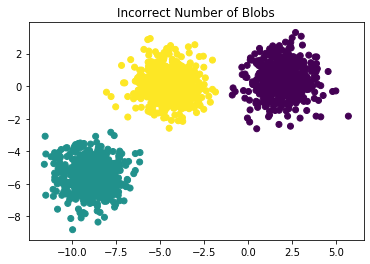

In [529]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

In [530]:
prototypes2 = get_initial_prototypes(X, 3)

In [363]:
prototypes2

array([[-9. , -5. ],
       [-4. ,  1. ],
       [ 2.5,  1. ]])

In [362]:
prototypes2 = np.array([[-9,-5],[-4,1],[2.5,1]])

In [532]:
data_to_cluster_list2, cluster_to_data_list2, prototype_list2 = OKM(X, prototypes2, t_max=30, epsilon=0.0001)

dict_keys([2, 0, 1])
0
mh: [[-0.54057112  1.42157326]
 [ 2.59911906  0.19615544]
 [-9.11986015 -4.41728023]]
(3, 2)
(3, 2)
dict_keys([0, 2, 1])
J: 34134.24125498886
J1_ 29024.97864255621
5109.2626124326525
1
mh: [[-2.09653385  1.55610839]
 [ 2.66320446  0.11255571]
 [-9.03000338 -4.94031701]]
(3, 2)
(3, 2)
dict_keys([0, 2, 1])
J: 29024.97864255621
J1_ 24465.455951402568
4559.522691153641
2
mh: [[-3.02823724  1.37664305]
 [ 2.49326662  0.24301472]
 [-8.94717784 -5.09662402]]
(3, 2)
(3, 2)
dict_keys([0, 2, 1])
J: 24465.455951402568
J1_ 21852.76282938865
2612.6931220139195
3
mh: [[-3.72533516  0.91998007]
 [ 2.29278243  0.33845558]
 [-8.96267676 -5.25794224]]
(3, 2)
(3, 2)
dict_keys([0, 2, 1])
J: 21852.76282938865
J1_ 19775.971558049903
2076.791271338745
4
mh: [[-4.23667972  0.40055209]
 [ 2.14974612  0.39649977]
 [-8.9705961  -5.40105755]]
(3, 2)
(3, 2)
dict_keys([0, 2, 1])
J: 19775.971558049903
J1_ 18728.29036128074
1047.6811967691647
5
mh: [[-4.48203368  0.12637362]
 [ 2.08041108  0.41

In [461]:
prototype_list2[1]

array([[-8.66666667, -4.33333333],
       [-4.33333333,  0.33333333],
       [ 2.        ,  0.33333333]])

In [462]:
len(cluster_to_data_list2)

12

In [463]:
prototypes2

array([[-9. , -5. ],
       [-4. ,  1. ],
       [ 2.5,  1. ]])

In [464]:
cluster_to_data_list2[0]

{2: [0, 3, 5], 1: [1, 6, 7], 0: [2, 4, 8]}

In [450]:
for n in cluster_to_data_list2[0][0]:
    print(n)

2
4
8


In [451]:
data_to_cluster_list2[0]

{0: [2], 1: [1], 2: [0], 3: [2], 4: [0], 5: [2], 6: [1], 7: [1], 8: [0]}

In [252]:
len(cluster_to_data_list2[2][2])

6

In [842]:
len(cluster_to_data2[2])

1005

In [843]:
y

array([1, 1, 0, ..., 2, 2, 2])

In [497]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 10, 1: 10, 2: 10}

In [533]:
y_new = []
for i in range(len(data_to_cluster_list2)):
    y_new2 = []
    for key in data_to_cluster_list2[i].keys():
        y_new2.append(data_to_cluster_list2[i][key])
        
    y_new.append(y_new2)

In [534]:
len(y_new2)

1500

In [535]:
len(y_new)

32

In [536]:
test_data_list = []
for i in range(len(y_new)):
    test_data_list.append(pd.DataFrame(y_new[i]))
    
    if 0 not in test_data_list[i].columns:
        test_data_list[i][0] = np.nan
        
    if 1 not in test_data_list[i].columns:
        test_data_list[i][1] = np.nan
    
    if 2 not in test_data_list[i].columns:
        test_data_list[i][2] = np.nan

In [538]:
for i in range(len(y_new)):
    test_data_list[i]['y'] = y

In [540]:
assigned_cluster_0_list = []  

for j in range(len(y_new)):
    assigned_cluster0 = []

    for i in range(len(test_data_list[0])):
        if test_data_list[j][0][i] == 0 or test_data_list[j][1][i] == 0 or test_data_list[j][2][i] == 0:
            assigned_cluster0.append(1)
        else:
            assigned_cluster0.append(0)
    
    assigned_cluster_0_list.append(assigned_cluster0)

In [541]:
np.sum(assigned_cluster_0_list[1])

736

In [542]:
assigned_cluster_1_list = []  

for j in range(len(y_new)):
    assigned_cluster1 = []

    for i in range(len(test_data_list[0])):
        if test_data_list[j][0][i] == 1 or test_data_list[j][1][i] == 1 or test_data_list[j][2][i] == 1:
            assigned_cluster1.append(1)
        else:
            assigned_cluster1.append(0)
    
    assigned_cluster_1_list.append(assigned_cluster1)

In [543]:
np.sum(assigned_cluster_1_list[0])

343

In [544]:
np.sum(assigned_cluster_1_list[1])

486

In [545]:
assigned_cluster_2_list = []  

for j in range(len(y_new)):
    assigned_cluster2 = []

    for i in range(len(test_data_list[0])):
        if test_data_list[j][0][i] == 2 or test_data_list[j][1][i] == 2 or test_data_list[j][2][i] == 2:
            assigned_cluster2.append(1)
        else:
            assigned_cluster2.append(0)
    
    assigned_cluster_2_list.append(assigned_cluster2)

In [546]:
np.sum(assigned_cluster_2_list[1])

840

In [586]:
cluster_matrix0 = metrics.cluster.contingency_matrix(test_data_list[0]['y'],assigned_cluster_0_list[7])

In [587]:
cluster_matrix0

array([[480,  20],
       [  0, 500],
       [474,  26]])

In [588]:
cluster_matrix1 = metrics.cluster.contingency_matrix(test_data_list[0]['y'],assigned_cluster_1_list[7])

In [589]:
cluster_matrix1

array([[500,   0],
       [474,  26],
       [  0, 500]])

In [590]:
cluster_matrix2 = metrics.cluster.contingency_matrix(test_data_list[0]['y'],assigned_cluster_2_list[7])

In [591]:
cluster_matrix2

array([[  0, 500],
       [482,  18],
       [500,   0]])

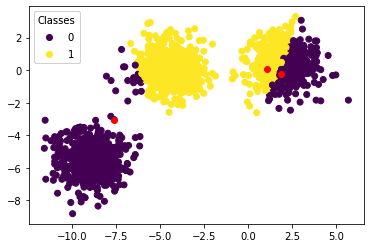

In [562]:
fig, ax = plt.subplots()

scatter = ax.scatter(X[:, 0], X[:, 1], c=assigned_cluster_0_list[0])
plt.scatter(prototype_list2[0][:,0], prototype_list2[0][:,1], c='r')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)

plt.show()

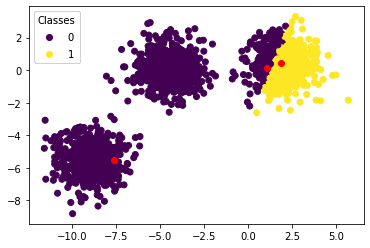

In [560]:
fig, ax = plt.subplots()

scatter = ax.scatter(X[:, 0], X[:, 1], c=assigned_cluster_1_list[0])
plt.scatter(prototype_list2[0][:,0], prototype_list2[6][:,1], c='r')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)

plt.show()

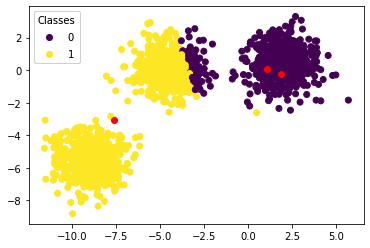

In [561]:
fig, ax = plt.subplots()

scatter = ax.scatter(X[:, 0], X[:, 1], c=assigned_cluster_2_list[0])
plt.scatter(prototype_list2[0][:,0], prototype_list2[0][:,1], c='r')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)

plt.show()

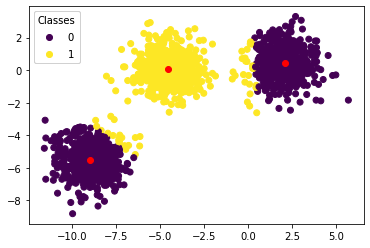

In [563]:
fig, ax = plt.subplots()

scatter = ax.scatter(X[:, 0], X[:, 1], c=assigned_cluster_0_list[7])
plt.scatter(prototype_list2[7][:,0], prototype_list2[7][:,1], c='r')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)

plt.show()

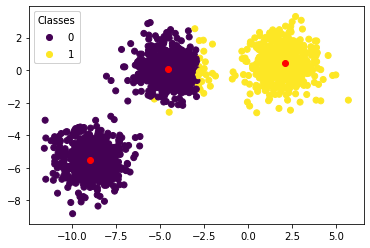

In [564]:
fig, ax = plt.subplots()

scatter = ax.scatter(X[:, 0], X[:, 1], c=assigned_cluster_1_list[7])
plt.scatter(prototype_list2[7][:,0], prototype_list2[7][:,1], c='r')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)

plt.show()

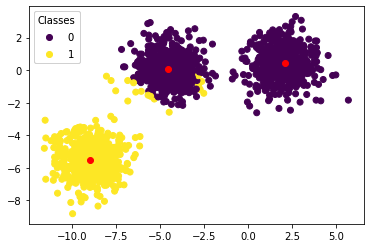

In [565]:
fig, ax = plt.subplots()

scatter = ax.scatter(X[:, 0], X[:, 1], c=assigned_cluster_2_list[7])
plt.scatter(prototype_list2[7][:,0], prototype_list2[7][:,1], c='r')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)

plt.show()

In [358]:
X

array([[  2.,   0.],
       [ -5.,   0.],
       [ -8.,  -5.],
       [  2.,   1.],
       [ -8.,  -4.],
       [  2.,   0.],
       [ -4.,   0.],
       [ -4.,   1.],
       [-10.,  -4.]])

In [359]:
y

array([2, 1, 0, 2, 0, 2, 1, 1, 0])

In [89]:
from metrics import get_precision
from metrics import get_recall
from metrics import get_f_measure

In [91]:
get_precision(cluster_matrix0[0])

0.5051856948583333

In [92]:
get_recall(cluster_matrix0[0])

0.9341832113263806

In [93]:
get_f_measure(cluster_matrix0[0])

0.6557540498632161

In [95]:
get_precision(cluster_matrix1[0])

0.5040987895778187

In [96]:
get_recall(cluster_matrix1[0])

0.536880081909723

In [97]:
get_f_measure(cluster_matrix1[0])

0.5199732806341988

In [98]:
get_precision(cluster_matrix2[0])

NameError: name 'cluster_matrix2' is not defined

In [609]:
get_recall(cluster_matrix2)

0.9768176352705411

In [610]:
get_f_measure(cluster_matrix2)

0.7386646514935988

In [175]:
fig = px.scatter_3d(tsne_3D_256_pandas, x='x', y='y', z='z')
fig.show()

In [177]:
tsne_3D_256_pandas.to_csv(path_or_buf='/home/t-anmend/tsne3d256.csv',index=False)

In [2]:
df = pd.read_csv('/home/t-anmend/tsne3d256.csv')

In [87]:
df.head()

,x,y,z
0,-1.675418,-3.561556,0.181824
1,3.980604,-10.353451,11.056458
2,15.788295,-6.811775,3.905337
3,11.759729,-8.110737,4.859850
4,8.843137,-11.952792,0.862166


In [4]:
df['x'][0] 

-1.675418

In [5]:
len(df)

2348

In [88]:
data_list_tsne3d_256[-1]

{0: [9, 25, 14],
 1: [35, 26, 30],
 2: [4],
 3: [16, 4, 35],
 4: [22, 16],
 5: [22, 32, 2],
 6: [6, 22],
 7: [35, 26, 30],
 8: [22, 13, 2],
 9: [37],
 10: [35, 26],
 11: [35],
 12: [35, 26],
 13: [2, 7, 32, 22],
 14: [26, 12, 13],
 15: [35, 26, 2],
 16: [26, 35],
 17: [32, 2],
 18: [22, 16],
 19: [16],
 20: [11, 16, 13, 35],
 21: [22, 2],
 22: [32, 2, 7],
 23: [26, 35],
 24: [33],
 25: [35, 22, 26, 13],
 26: [27, 34, 33],
 27: [20, 34],
 28: [37, 8, 14, 27],
 29: [11, 20],
 30: [35],
 31: [35, 26],
 32: [35],
 33: [35, 26],
 34: [35, 26],
 35: [15],
 36: [14],
 37: [31, 36, 10],
 38: [35],
 39: [35, 26],
 40: [35, 30],
 41: [27, 10, 3],
 42: [26, 35, 2, 13],
 43: [29, 11, 34],
 44: [11],
 45: [2, 22, 7],
 46: [27, 37],
 47: [35, 26],
 48: [26, 35],
 49: [32],
 50: [31, 10],
 51: [6, 13],
 52: [35],
 53: [35, 30],
 54: [35],
 55: [35, 30],
 56: [26, 35, 30, 13],
 57: [20, 34],
 58: [8, 18, 10],
 59: [27, 37],
 60: [35, 30, 26],
 61: [35, 26],
 62: [33, 8, 27, 18],
 63: [35, 26],
 64: [2

In [96]:
assigned_dict_3d_256 = {}

In [97]:
assigned_dict_3d_256

{}

In [98]:
for key in data_list_tsne3d_256[-1]:
    assigned_dict_3d_256[key] = set(data_list_tsne3d_256[-1][key])
    

In [99]:
assigned_dict_3d_256

{0: {9, 14, 25},
 1: {26, 30, 35},
 2: {4},
 3: {4, 16, 35},
 4: {16, 22},
 5: {2, 22, 32},
 6: {6, 22},
 7: {26, 30, 35},
 8: {2, 13, 22},
 9: {37},
 10: {26, 35},
 11: {35},
 12: {26, 35},
 13: {2, 7, 22, 32},
 14: {12, 13, 26},
 15: {2, 26, 35},
 16: {26, 35},
 17: {2, 32},
 18: {16, 22},
 19: {16},
 20: {11, 13, 16, 35},
 21: {2, 22},
 22: {2, 7, 32},
 23: {26, 35},
 24: {33},
 25: {13, 22, 26, 35},
 26: {27, 33, 34},
 27: {20, 34},
 28: {8, 14, 27, 37},
 29: {11, 20},
 30: {35},
 31: {26, 35},
 32: {35},
 33: {26, 35},
 34: {26, 35},
 35: {15},
 36: {14},
 37: {10, 31, 36},
 38: {35},
 39: {26, 35},
 40: {30, 35},
 41: {3, 10, 27},
 42: {2, 13, 26, 35},
 43: {11, 29, 34},
 44: {11},
 45: {2, 7, 22},
 46: {27, 37},
 47: {26, 35},
 48: {26, 35},
 49: {32},
 50: {10, 31},
 51: {6, 13},
 52: {35},
 53: {30, 35},
 54: {35},
 55: {30, 35},
 56: {13, 26, 30, 35},
 57: {20, 34},
 58: {8, 10, 18},
 59: {27, 37},
 60: {26, 30, 35},
 61: {26, 35},
 62: {8, 18, 27, 33},
 63: {26, 35},
 64: {2

In [102]:
counter = 0
class_counter = []
unique_label_set = []
class_dict_unique = {}
unique_list = []

c_counter = 0

for i in range(len(assigned_dict_3d_256)-1):
    for j in range(i+1,len(assigned_dict_3d_256)):
        if assigned_dict_3d_256[i] == assigned_dict_3d_256[j]:
            counter = counter + 1
    class_counter.append(counter)
    counter = 0
    if assigned_dict_3d_256[i] not in unique_label_set:
        unique_label_set.append(assigned_dict_3d_256[i])
        class_dict_unique[c_counter] = assigned_dict_3d_256[i]
        c_counter = c_counter + 1
        
if assigned_dict_3d_256[j] not in unique_label_set:
    unique_label_set.append(assigned_dict_3d_256[j])

In [104]:
len(unique_label_set)

456

In [105]:
len(class_dict_unique)

456

In [146]:
assigned_dict_3d_256

{0: {9, 14, 25},
 1: {26, 30, 35},
 2: {4},
 3: {4, 16, 35},
 4: {16, 22},
 5: {2, 22, 32},
 6: {6, 22},
 7: {26, 30, 35},
 8: {2, 13, 22},
 9: {37},
 10: {26, 35},
 11: {35},
 12: {26, 35},
 13: {2, 7, 22, 32},
 14: {12, 13, 26},
 15: {2, 26, 35},
 16: {26, 35},
 17: {2, 32},
 18: {16, 22},
 19: {16},
 20: {11, 13, 16, 35},
 21: {2, 22},
 22: {2, 7, 32},
 23: {26, 35},
 24: {33},
 25: {13, 22, 26, 35},
 26: {27, 33, 34},
 27: {20, 34},
 28: {8, 14, 27, 37},
 29: {11, 20},
 30: {35},
 31: {26, 35},
 32: {35},
 33: {26, 35},
 34: {26, 35},
 35: {15},
 36: {14},
 37: {10, 31, 36},
 38: {35},
 39: {26, 35},
 40: {30, 35},
 41: {3, 10, 27},
 42: {2, 13, 26, 35},
 43: {11, 29, 34},
 44: {11},
 45: {2, 7, 22},
 46: {27, 37},
 47: {26, 35},
 48: {26, 35},
 49: {32},
 50: {10, 31},
 51: {6, 13},
 52: {35},
 53: {30, 35},
 54: {35},
 55: {30, 35},
 56: {13, 26, 30, 35},
 57: {20, 34},
 58: {8, 10, 18},
 59: {27, 37},
 60: {26, 30, 35},
 61: {26, 35},
 62: {8, 18, 27, 33},
 63: {26, 35},
 64: {2

In [106]:
class_dict_unique

{0: {9, 14, 25},
 1: {26, 30, 35},
 2: {4},
 3: {4, 16, 35},
 4: {16, 22},
 5: {2, 22, 32},
 6: {6, 22},
 7: {2, 13, 22},
 8: {37},
 9: {26, 35},
 10: {35},
 11: {2, 7, 22, 32},
 12: {12, 13, 26},
 13: {2, 26, 35},
 14: {2, 32},
 15: {16},
 16: {11, 13, 16, 35},
 17: {2, 22},
 18: {2, 7, 32},
 19: {33},
 20: {13, 22, 26, 35},
 21: {27, 33, 34},
 22: {20, 34},
 23: {8, 14, 27, 37},
 24: {11, 20},
 25: {15},
 26: {14},
 27: {10, 31, 36},
 28: {30, 35},
 29: {3, 10, 27},
 30: {2, 13, 26, 35},
 31: {11, 29, 34},
 32: {11},
 33: {2, 7, 22},
 34: {27, 37},
 35: {32},
 36: {10, 31},
 37: {6, 13},
 38: {13, 26, 30, 35},
 39: {8, 10, 18},
 40: {8, 18, 27, 33},
 41: {7},
 42: {11, 13},
 43: {11, 20, 34},
 44: {22},
 45: {8},
 46: {27, 33},
 47: {34},
 48: {3, 27},
 49: {11, 13, 25},
 50: {0},
 51: {11, 29},
 52: {23, 24},
 53: {4, 16},
 54: {13, 16},
 55: {16, 35},
 56: {6, 28, 32},
 57: {8, 14, 27, 33, 37},
 58: {16, 22, 32},
 59: {12, 13},
 60: {11, 29, 34, 37},
 61: {8, 37},
 62: {8, 18},
 63

In [107]:
for i in range(len(assigned_dict_3d_256)):
    for j in range(len(class_dict_unique)):
        if assigned_dict_3d_256[i] == class_dict_unique[j]:
            unique_list.append(j)

In [110]:
len(unique_list)

2348

In [149]:
df['color'] = unique_list

In [157]:
df['clusters'] = df['clusters'].apply(lambda x: assigned_dict_3d_256.get(x))

In [162]:
for i in len(df['clusters']):
    if len(df['clusters'][i]) == 1:
        df['color_'][i] = int(df['clusters'][i])
    elif 

0           {9, 25, 14}
1          {26, 35, 30}
2                   {4}
3           {16, 35, 4}
4              {16, 22}
             ...       
2343    {27, 33, 18, 3}
2344                {0}
2345        {2, 12, 13}
2346           {13, 22}
2347            {0, 30}
Name: clusters, Length: 2348, dtype: object

In [225]:
df['files'] = files

In [207]:
df.head()

,x,y,z,color,clusters,files
0,-1.675418,-3.561556,0.181824,0,"{9, 25, 14}",01_000006.pkl
1,3.980604,-10.353451,11.056458,1,"{26, 35, 30}",01_000038.pkl
2,15.788295,-6.811775,3.905337,2,{4},01_000061.pkl
3,11.759729,-8.110737,4.859850,3,"{16, 35, 4}",01_000126.pkl
4,8.843137,-11.952792,0.862166,4,"{16, 22}",01_000143.pkl


In [151]:
df['clusters'] = assigned_dict_3d_256

In [190]:
tsne_2D_256_pandas.to_csv(path_or_buf='/home/t-anmend/tsne2d256.csv',index=False)

In [208]:
df.to_csv(path_or_buf='/home/t-anmend/tsne3d256.csv',index=False)

In [116]:
for i in range(len(df['color'])):
    string = 'cluster: ' + str(df['color'][i])

In [117]:
string

'cluster: 186'

In [176]:
hovertext = ['cluster: ']*len(df['color']) + df['clusters'].astype(str)

In [177]:
hovertext

0           cluster: {9, 25, 14}
1          cluster: {26, 35, 30}
2                   cluster: {4}
3           cluster: {16, 35, 4}
4              cluster: {16, 22}
                  ...           
2343    cluster: {27, 33, 18, 3}
2344                cluster: {0}
2345        cluster: {2, 12, 13}
2346           cluster: {13, 22}
2347            cluster: {0, 30}
Name: clusters, Length: 2348, dtype: object

In [192]:
point_text = '{0}'

In [193]:
point_text

'{0}'

In [194]:
pt = set([int(x) for x in point_text[point_text.find("{")+1:point_text.find("}")].split(', ')])

In [195]:
pt

{0}

In [198]:
type(df['clusters'][0])

set

In [209]:
selectedpoints = df.loc[df['clusters'] == pt]

In [223]:
selectedpoints.head()

,x,y,z,color,clusters,files
81,-3.343033,0.018024,15.781384,50,{0},01_001496.pkl
167,-5.250671,0.801809,17.154980,50,{0},01_002711.pkl
304,-5.920015,1.320502,17.051876,50,{0},08_000947.pkl
309,-4.571859,0.229156,17.580988,50,{0},08_001723.pkl
317,-3.970226,1.359177,16.988610,50,{0},08_002839.pkl


In [322]:
len(selectedpoints)

48

In [145]:
df.index.values

array([   0,    1,    2, ..., 2345, 2346, 2347])

In [213]:
imgs_paths = [path for path in os.path.join(os.path.splitext(df.loc[df['clusters'] == point_text, ['files']])[0].astype(str), '.jpg')]

TypeError: expected str, bytes or os.PathLike object, not DataFrame

In [224]:
df.head()

,x,y,z,color,clusters,files
0,-1.675418,-3.561556,0.181824,0,"{9, 25, 14}",01_000006.pkl
1,3.980604,-10.353451,11.056458,1,"{26, 35, 30}",01_000038.pkl
2,15.788295,-6.811775,3.905337,2,{4},01_000061.pkl
3,11.759729,-8.110737,4.859850,3,"{16, 35, 4}",01_000126.pkl
4,8.843137,-11.952792,0.862166,4,"{16, 22}",01_000143.pkl


In [252]:
paths = df.loc[df['clusters'] == pt, ['files']].values

In [272]:
[os.path.splitext(path_list[i])[0] + '.jpg' for i in range(len(path_list))]

TypeError: expected str, bytes or os.PathLike object, not numpy.ndarray

In [254]:
len(paths)

48

In [260]:
path_list = [paths[i][0] for i in range(len(paths))]

In [261]:
path_list

['01_001496.pkl',
 '01_002711.pkl',
 '08_000947.pkl',
 '08_001723.pkl',
 '08_002839.pkl',
 '12_003058.pkl',
 '15_000349.pkl',
 '16_000519.pkl',
 '16_000816.pkl',
 '16_001308.pkl',
 '16_001564.pkl',
 '16_001927.pkl',
 '16_002337.pkl',
 '18_001657.pkl',
 '20_001004.pkl',
 '22_000410.pkl',
 '22_000753.pkl',
 '22_000875.pkl',
 '25_000114.pkl',
 '25_001078.pkl',
 '25_001607.pkl',
 '25_002963.pkl',
 '27_002114.pkl',
 '29_001349.pkl',
 '31_000296.pkl',
 '31_001074.pkl',
 '31_001720.pkl',
 '31_002313.pkl',
 '32_000288.pkl',
 '32_000628.pkl',
 '32_001202.pkl',
 '32_001763.pkl',
 '32_001921.pkl',
 '34_000580.pkl',
 '34_000732.pkl',
 '34_001081.pkl',
 '34_002169.pkl',
 '34_002331.pkl',
 '38_000322.pkl',
 '38_001770.pkl',
 '38_002118.pkl',
 '39_000812.pkl',
 '39_001717.pkl',
 '41_000039.pkl',
 '41_000059.pkl',
 '41_000747.pkl',
 '41_001099.pkl',
 '41_003078.pkl']

In [270]:
imgs_paths = [os.path.splitext(path_list[i])[0] + '.jpg' for i in range(len(path_list))]

In [271]:
imgs_paths

['01_001496.jpg',
 '01_002711.jpg',
 '08_000947.jpg',
 '08_001723.jpg',
 '08_002839.jpg',
 '12_003058.jpg',
 '15_000349.jpg',
 '16_000519.jpg',
 '16_000816.jpg',
 '16_001308.jpg',
 '16_001564.jpg',
 '16_001927.jpg',
 '16_002337.jpg',
 '18_001657.jpg',
 '20_001004.jpg',
 '22_000410.jpg',
 '22_000753.jpg',
 '22_000875.jpg',
 '25_000114.jpg',
 '25_001078.jpg',
 '25_001607.jpg',
 '25_002963.jpg',
 '27_002114.jpg',
 '29_001349.jpg',
 '31_000296.jpg',
 '31_001074.jpg',
 '31_001720.jpg',
 '31_002313.jpg',
 '32_000288.jpg',
 '32_000628.jpg',
 '32_001202.jpg',
 '32_001763.jpg',
 '32_001921.jpg',
 '34_000580.jpg',
 '34_000732.jpg',
 '34_001081.jpg',
 '34_002169.jpg',
 '34_002331.jpg',
 '38_000322.jpg',
 '38_001770.jpg',
 '38_002118.jpg',
 '39_000812.jpg',
 '39_001717.jpg',
 '41_000039.jpg',
 '41_000059.jpg',
 '41_000747.jpg',
 '41_001099.jpg',
 '41_003078.jpg']

In [269]:
os.path.splitext(path_list[0])[0]

'01_001496'

In [276]:
np.random.choice(imgs_paths, 1).tolist()[0]

'32_000628.jpg'

In [293]:
list1 = []
list2 = []

for i in range(10):
    list1.append([i,'hello '+str(i)])
    list2.append([list1[i], 'list2 '+str(i)])
    #list2.append([i,'hello '+str(i)])
    #list2.append('list2 '+str(i))
'''
for i in range(len(list1)):
    list2.append([list1[i], 'list2 '+str(i)])'''
    

"\nfor i in range(len(list1)):\n    list2.append([list1[i], 'list2 '+str(i)])"

In [291]:
len(list1)

10

In [294]:
list2

[[[0, 'hello 0'], 'list2 0'],
 [[1, 'hello 1'], 'list2 1'],
 [[2, 'hello 2'], 'list2 2'],
 [[3, 'hello 3'], 'list2 3'],
 [[4, 'hello 4'], 'list2 4'],
 [[5, 'hello 5'], 'list2 5'],
 [[6, 'hello 6'], 'list2 6'],
 [[7, 'hello 7'], 'list2 7'],
 [[8, 'hello 8'], 'list2 8'],
 [[9, 'hello 9'], 'list2 9']]

In [297]:
import json

In [298]:
files_test = json.dumps(imgs_paths)

In [299]:
files_test

'["01_001496.jpg", "01_002711.jpg", "08_000947.jpg", "08_001723.jpg", "08_002839.jpg", "12_003058.jpg", "15_000349.jpg", "16_000519.jpg", "16_000816.jpg", "16_001308.jpg", "16_001564.jpg", "16_001927.jpg", "16_002337.jpg", "18_001657.jpg", "20_001004.jpg", "22_000410.jpg", "22_000753.jpg", "22_000875.jpg", "25_000114.jpg", "25_001078.jpg", "25_001607.jpg", "25_002963.jpg", "27_002114.jpg", "29_001349.jpg", "31_000296.jpg", "31_001074.jpg", "31_001720.jpg", "31_002313.jpg", "32_000288.jpg", "32_000628.jpg", "32_001202.jpg", "32_001763.jpg", "32_001921.jpg", "34_000580.jpg", "34_000732.jpg", "34_001081.jpg", "34_002169.jpg", "34_002331.jpg", "38_000322.jpg", "38_001770.jpg", "38_002118.jpg", "39_000812.jpg", "39_001717.jpg", "41_000039.jpg", "41_000059.jpg", "41_000747.jpg", "41_001099.jpg", "41_003078.jpg"]'

In [300]:
json.loads(files_test)

['01_001496.jpg',
 '01_002711.jpg',
 '08_000947.jpg',
 '08_001723.jpg',
 '08_002839.jpg',
 '12_003058.jpg',
 '15_000349.jpg',
 '16_000519.jpg',
 '16_000816.jpg',
 '16_001308.jpg',
 '16_001564.jpg',
 '16_001927.jpg',
 '16_002337.jpg',
 '18_001657.jpg',
 '20_001004.jpg',
 '22_000410.jpg',
 '22_000753.jpg',
 '22_000875.jpg',
 '25_000114.jpg',
 '25_001078.jpg',
 '25_001607.jpg',
 '25_002963.jpg',
 '27_002114.jpg',
 '29_001349.jpg',
 '31_000296.jpg',
 '31_001074.jpg',
 '31_001720.jpg',
 '31_002313.jpg',
 '32_000288.jpg',
 '32_000628.jpg',
 '32_001202.jpg',
 '32_001763.jpg',
 '32_001921.jpg',
 '34_000580.jpg',
 '34_000732.jpg',
 '34_001081.jpg',
 '34_002169.jpg',
 '34_002331.jpg',
 '38_000322.jpg',
 '38_001770.jpg',
 '38_002118.jpg',
 '39_000812.jpg',
 '39_001717.jpg',
 '41_000039.jpg',
 '41_000059.jpg',
 '41_000747.jpg',
 '41_001099.jpg',
 '41_003078.jpg']

In [301]:
if '41_003078.jpg' in files_test:
    print(True)

True


In [302]:
type(df['clusters'][0])

set

In [303]:
string = str(df['clusters'][0])

In [316]:
string

'{9, 25, 14}'

In [306]:
strs = string.replace("'",'"')

In [308]:
strs

'{9, 25, 14}'

In [309]:
strs[0]

'{'

In [310]:
strs = strs[1:-1]

In [311]:
strs

'9, 25, 14'

In [312]:
splits = strs.split(', ')

In [313]:
splits

['9', '25', '14']

In [315]:
len(splits)

3

In [317]:
strs = string[1:-1].split(', ')

In [318]:
strs

['9', '25', '14']

In [320]:
len(np.unique(df['clusters']))

2271

In [321]:
len(df['clusters'])

2348

In [326]:
test_df = pd.DataFrame()
test_df['clusters'] = df['clusters'].copy()

In [334]:
cstring = []
for i in range(len(test_df['clusters'])):
    cstring.append(str(test_df['clusters'][i]))

In [335]:
test_df['cluster_string'] = cstring

In [336]:
test_df.head()

,clusters,cluster_string
0,"{9, 25, 14}","{9, 25, 14}"
1,"{26, 35, 30}","{26, 35, 30}"
2,{4},{4}
3,"{16, 35, 4}","{16, 35, 4}"
4,"{16, 22}","{16, 22}"


In [339]:
test_df['cluster_string'][1]

'{26, 35, 30}'

In [350]:
df.loc[test_df['cluster_string'] == test_df['cluster_string'][11]]

,x,y,z,color,clusters,files
11,8.211881,-8.118709,10.136472,10,{35},01_000219.pkl
30,6.235630,-9.838074,10.740733,10,{35},01_000596.pkl
32,8.615511,-11.079297,11.364354,10,{35},01_000702.pkl
38,7.358652,-10.064375,7.970711,10,{35},01_000794.pkl
52,7.859482,-9.983237,11.646469,10,{35},01_001086.pkl
54,7.955060,-10.810709,10.951112,10,{35},01_001134.pkl
83,6.279476,-10.148544,12.560014,10,{35},01_001524.pkl
84,7.892184,-9.368296,11.083003,10,{35},01_001534.pkl
86,7.324034,-10.343694,13.198295,10,{35},01_001557.pkl
102,8.109243,-11.722551,9.411375,10,{35},01_001696.pkl


In [359]:
i = 13

In [360]:
df.loc[test_df['cluster_string'] == test_df['cluster_string'][i]].index[0] == i

True

In [373]:
df.loc[test_df['cluster_string'] == test_df['cluster_string'][i]]['clusters'].reset_index(drop=True)[0]

{2, 7, 22, 32}